### LIBRERÍAS 

In [1]:
# Datos
import pandas as pd
import numpy as np

# Para analizar las cadenas y convertirlas en conjunto
import ast

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Normalización
from sklearn.preprocessing import MinMaxScaler

# Herramientas
from collections import Counter
from sklearn.neighbors import NearestNeighbors

# Clusterin
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('../proyecto2/Data/df_Clean_TripAdvisor 2023-09-05 14_24_13.csv')
df.head()

,Unnamed: 0,Nombre,Score,Excelente,MuyBueno,Normal,Malo,Pesimo,Num_Reviews,Posicion,...,America Sur,Italiana,Española,Eur Occidental,Asador,N/A,India,Num_Reviews_Spain,Latitud,Longitud
0,0,El Capote,3.5,8,10,4,3,6,35,3525.0,...,0,0,1,0,0,0,0,31,40.420736,-3.684830
1,1,La Queda,4.5,8,3,0,0,0,13,1734.0,...,0,0,1,0,0,0,0,11,40.395330,-3.710880
2,2,Limbo Tribunal,4.0,86,57,11,12,8,191,41.0,...,0,0,0,0,1,0,0,174,40.425231,-3.700218
3,3,400 Grados Pizza - Maria de Molina,5.0,20,1,1,0,0,25,196.0,...,0,1,0,0,0,1,0,22,40.437473,-3.678595
4,4,Ginos,3.5,15,11,11,9,8,66,2166.0,...,0,1,1,0,0,1,0,54,NaN,NaN


### LIMPIEZA Y PROCESAMIENTO DE DATOS

In [4]:
df.isna().sum()

Unnamed: 0              0
Nombre                  0
Score                   0
Excelente               0
MuyBueno                0
Normal                  0
Malo                    0
Pesimo                  0
Num_Reviews             0
Posicion               15
Rango_precio            0
Tipo_Cocina             0
Awards                  0
Score_Comida         3822
Score_Servicio       3842
Calidad_Precio       3896
Ambiente             7574
Direccion               0
Web_TripAdvisor         0
Latina                  0
Eur Este                0
Africana                0
China                   0
Japonesa                0
Arabe                   0
Mexicana                0
Caribeña                0
Asiatica                0
America Norte           0
America Sur             0
Italiana                0
Española                0
Eur Occidental          0
Asador                  0
N/A                     0
India                   0
Num_Reviews_Spain       0
Latitud              3058
Longitud    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9412 entries, 0 to 9411
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9412 non-null   int64  
 1   Nombre             9412 non-null   object 
 2   Score              9412 non-null   float64
 3   Excelente          9412 non-null   int64  
 4   MuyBueno           9412 non-null   int64  
 5   Normal             9412 non-null   int64  
 6   Malo               9412 non-null   int64  
 7   Pesimo             9412 non-null   int64  
 8   Num_Reviews        9412 non-null   int64  
 9   Posicion           9397 non-null   float64
 10  Rango_precio       9412 non-null   object 
 11  Tipo_Cocina        9412 non-null   object 
 12  Awards             9412 non-null   int64  
 13  Score_Comida       5590 non-null   float64
 14  Score_Servicio     5570 non-null   float64
 15  Calidad_Precio     5516 non-null   float64
 16  Ambiente           1838 

In [6]:
df.drop(["Unnamed: 0","Score_Comida", "Score_Servicio", "Calidad_Precio", "Ambiente", "Latitud", "Longitud", "Posicion"], axis=1, inplace=True)

In [7]:
df["Tipo_Cocina"]

0                                            ['Española']
1                                            ['Española']
2                    ['Restaurante de carne', 'Barbacoa']
3                      ['Italiana', 'Pizza', 'Saludable']
4       ['Italiana', 'Mediterránea', 'Opciones vegetar...
                              ...                        
9407                                                   []
9408              ['Mediterránea', 'Europea', 'Española']
9409                               ['Española', 'Fusión']
9410    ['Mediterránea', 'Española', 'Opciones vegetar...
9411             ['Italiana', 'Mediterránea', 'Española']
Name: Tipo_Cocina, Length: 9412, dtype: object

In [8]:
# Función para fusionar conjuntos
def fusionar_conjuntos(cadena, conjunto_actual):
    try:
        # Utilizar ast.literal_eval para convertir la cadena en una lista
        lista = ast.literal_eval(cadena)
        # Fusionar la lista con el conjunto actual
        conjunto_actual.update(lista)
        return conjunto_actual
    
    except (SyntaxError, ValueError):
        # Manejar errores si la cadena no es válida
        return conjunto_actual

In [9]:
array_original = df.Tipo_Cocina.values
# Inicializar un conjunto vacío
conjunto_total = set()
# Aplicar la función de fusión a cada elemento del array
conjunto_total = np.vectorize(fusionar_conjuntos, otypes=[set])(array_original, conjunto_total)
# el conjunto total resultante
conjunto_total = conjunto_total[0]

In [10]:
conjunto_total

{'Afgana',
 'Africana',
 'Albanesa',
 'Alemana',
 'Alimentos medicinales',
 'Americana',
 'Apuliana',
 'Argentina',
 'Asador',
 'Asiática',
 'Azerbayana',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbacoa',
 'Bares para comer',
 'Belga',
 'Brasileña',
 'Británica',
 'Café',
 'Cajún y criolla',
 'Calabresa',
 'Cantonesa',
 'Caribeña',
 'Centroamericana',
 'Centroeuropea',
 'Chilena',
 'China',
 'China imperial',
 'China noroccidental',
 'Cocina de Pekín',
 'Colombiana',
 'Comedor',
 'Comida rápida',
 'Confitería japonesa',
 'Contemporánea',
 'Coreana',
 'Cubana',
 'De Asia central',
 'De Campania',
 'De Europa oriental',
 'De Oriente Medio',
 'De Shanghai',
 'Del Lacio',
 'Del centro de Italia',
 'Del norte de Italia',
 'Del sur de Italia',
 'Ecuatoriana',
 'Egipcia',
 'Eslovena',
 'Española',
 'Etíope',
 'Europea',
 'Filipina',
 'Francesa',
 'Fujian',
 'Fusión',
 'Fusión japonesa',
 'Georgiana',
 'Griega',
 'Halal ',
 'Hawaiana',
 'Holandesa',
 'Hunan',
 'India',
 'Indonesia',
 'Internacion

In [11]:
diccionario_tipo_comida = {
    'Europa': ['Británica', 'Belga', 'Francesa', 'Italiana', 'Española', 'Alemana', 'Suiza', 'Sarda', 'Eslovena', 'Sueca', 'Holandesa', 'Portuguesa', 'Griega', 'Vasca'],
    'América del Norte': ['Americana', 'Canadiense', 'Mexicana', 'Cajún y criolla', 'Caribeña', 'Centroamericana'],
    'América del Sur': ['Argentina', 'Brasileña', 'Chilena', 'Peruana', 'Colombiana', 'Venezolana', 'Ecuatoriana'],
    'Asia': ['Bangladeshi', 'Coreana', 'Afgana', 'China', 'Indonesia', 'India', 'Nepalí', 'Pakistaní', 'Tailandesa', 'Filipina', 'Vietnamita', 'Tibetana', 'Turca', 'Libanesa', 'Fujian', 'Balti', 'Persa'],
    'Oriente Medio y África': ['Halal', 'De Oriente Medio', 'Etíope', 'Africana', 'Marroquí', 'Israelí'],
    'Otros': ['Internacional', 'Fusión', 'Opciones sin gluten', 'Opciones veganas', 'Saludable', 'Postres', 'Street food / Comida en la calle', 'Alimentos medicinales', 'Tentempiés', 'Tienda gourmet', 'Solo entrega a domicilio']
                        }

# Quitar los corchetes de la columna
df['Tipo_Cocina'] = df['Tipo_Cocina'].str.strip('[]')

# Crear columnas para cada clave del diccionario
for clave in diccionario_tipo_comida.keys():
    df[clave] = df['Tipo_Cocina'].apply(lambda x: 1 if any(comida in x for comida in diccionario_tipo_comida[clave]) else 0)

In [12]:
df.drop(["Italiana", "Latina", "Eur Este", "Africana", "China", "Japonesa", "Arabe", "Mexicana", "Caribeña", "Asiatica", "America Norte", "America Sur", "Española", "Eur Occidental", "Asador", "N/A", "India"], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9412 entries, 0 to 9411
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nombre                  9412 non-null   object 
 1   Score                   9412 non-null   float64
 2   Excelente               9412 non-null   int64  
 3   MuyBueno                9412 non-null   int64  
 4   Normal                  9412 non-null   int64  
 5   Malo                    9412 non-null   int64  
 6   Pesimo                  9412 non-null   int64  
 7   Num_Reviews             9412 non-null   int64  
 8   Rango_precio            9412 non-null   object 
 9   Tipo_Cocina             9412 non-null   object 
 10  Awards                  9412 non-null   int64  
 11  Direccion               9412 non-null   object 
 12  Web_TripAdvisor         9412 non-null   object 
 13  Num_Reviews_Spain       9412 non-null   int64  
 14  Europa                  9412 non-null   

In [14]:
df.head()

,Nombre,Score,Excelente,MuyBueno,Normal,Malo,Pesimo,Num_Reviews,Rango_precio,Tipo_Cocina,Awards,Direccion,Web_TripAdvisor,Num_Reviews_Spain,Europa,América del Norte,América del Sur,Asia,Oriente Medio y África,Otros
0,El Capote,3.5,8,10,4,3,6,35,€,'Española',0,"['Calle Alcala 269', ' 28027 Madrid España']",https://www.tripadvisor.es/Restaurant_Review-g...,31,1,0,0,0,0,0
1,La Queda,4.5,8,3,0,0,0,13,€,'Española',0,"['Calle de Antonio López', ' 48', ' 28019 Madr...",https://www.tripadvisor.es/Restaurant_Review-g...,11,1,0,0,0,0,0
2,Limbo Tribunal,4.0,86,57,11,12,8,191,€€ - €€€,"'Restaurante de carne', 'Barbacoa'",1,"['Calle de San Mateo 3', ' 28004 Madrid España']",https://www.tripadvisor.es/Restaurant_Review-g...,174,0,0,0,0,0,0
3,400 Grados Pizza - Maria de Molina,5.0,20,1,1,0,0,25,€€ - €€€,"'Italiana', 'Pizza', 'Saludable'",0,"['Calle Maria de Molina 30', ' 28006 Madrid Es...",https://www.tripadvisor.es/Restaurant_Review-g...,22,1,0,0,0,0,1
4,Ginos,3.5,15,11,11,9,8,66,€€ - €€€,"'Italiana', 'Mediterránea', 'Opciones vegetari...",0,"[""Calle de O'donnell"", ' 17', ' 28009 Madrid E...",https://www.tripadvisor.es/Restaurant_Review-g...,54,1,0,0,0,0,0


In [15]:
df.columns

Index(['Nombre', 'Score', 'Excelente', 'MuyBueno', 'Normal', 'Malo', 'Pesimo',
       'Num_Reviews', 'Rango_precio', 'Tipo_Cocina', 'Awards', 'Direccion',
       'Web_TripAdvisor', 'Num_Reviews_Spain', 'Europa', 'América del Norte',
       'América del Sur', 'Asia', 'Oriente Medio y África', 'Otros'],
      dtype='object')

### VISUALIZACIONES

<Axes: xlabel='Num_Reviews', ylabel='Count'>

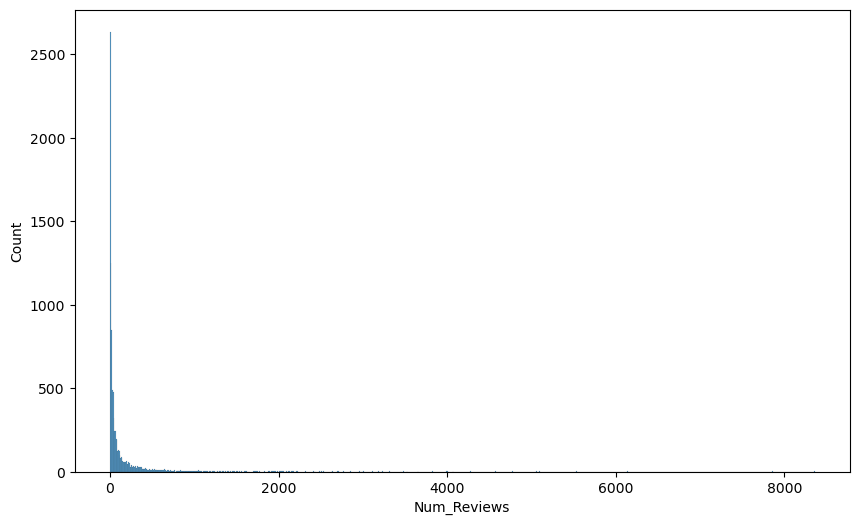

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Num_Reviews"])

In [17]:
df = df[df["Num_Reviews"] != 0]

<Axes: xlabel='Score', ylabel='Count'>

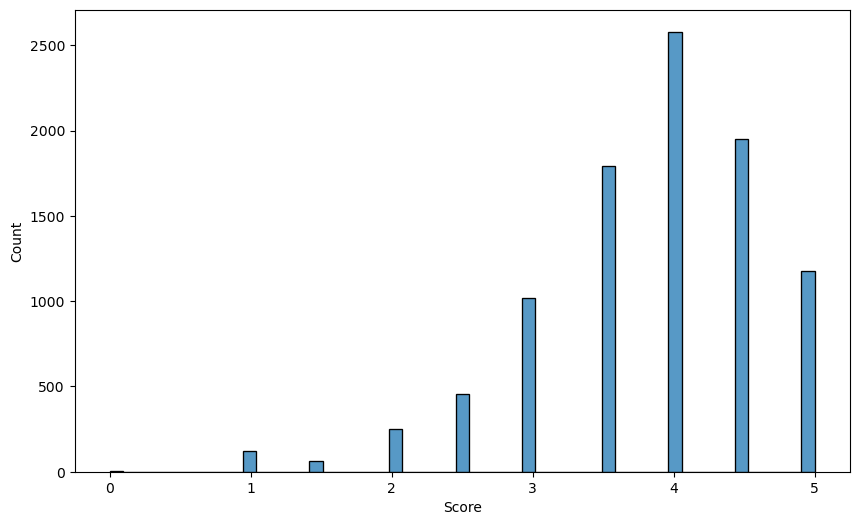

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Score"])

<Axes: xlabel='Rango_precio', ylabel='Count'>

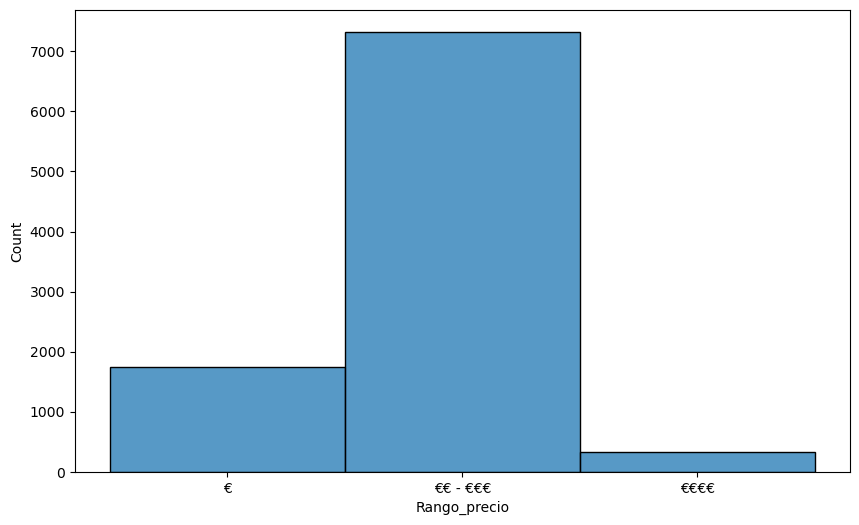

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Rango_precio"])

In [18]:
df_1 = pd.get_dummies(df['Rango_precio'])
# Concatenar los datos originales con las variables dummy
df = pd.concat([df, df_1], axis=1)

In [19]:
columnas_numericas = df.select_dtypes(include=['number']).columns.to_list()

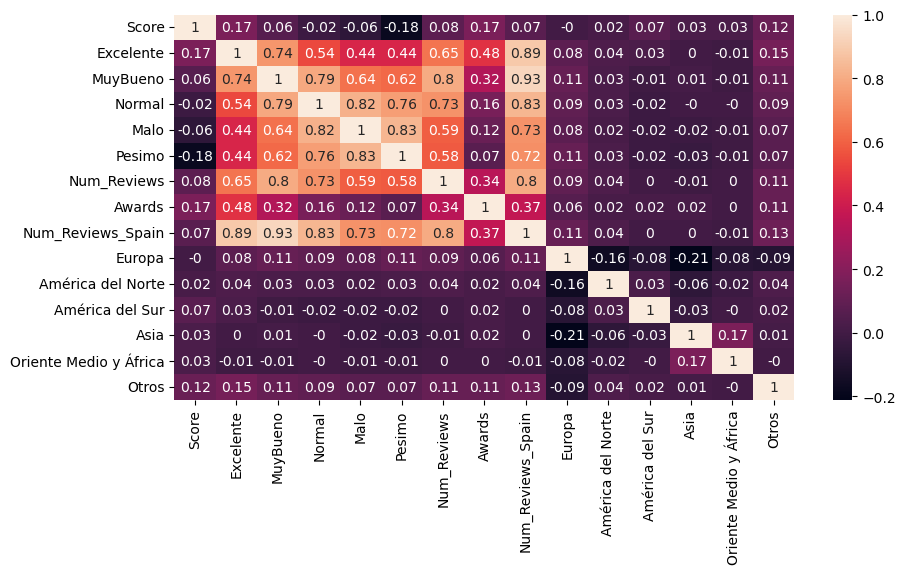

In [20]:
plt.figure(figsize = (10, 5))
sns.heatmap(data = df[columnas_numericas].corr().round(2), annot = True)
plt.show()

In [21]:
df.drop("Rango_precio", axis=1, inplace=True)

In [22]:
df["Excelente"] = df["Excelente"]/df["Num_Reviews_Spain"]
df["MuyBueno"] = df["MuyBueno"]/df["Num_Reviews_Spain"]
df["Normal"] = df["Normal"]/df["Num_Reviews_Spain"]
df["Malo"] = df["Malo"]/df["Num_Reviews_Spain"]
df["Pesimo"] = df["Pesimo"]/df["Num_Reviews_Spain"]

In [23]:
df["Total"] = df["Excelente"] + df["MuyBueno"] + df["Normal"] + df["Malo"] + df["Pesimo"]

In [24]:
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(df[columnas_numericas])

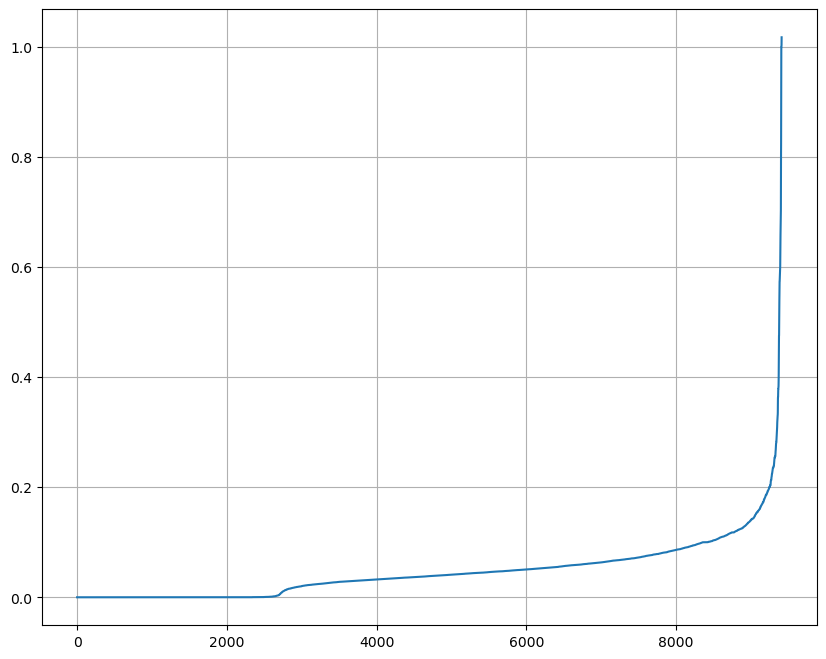

In [25]:
# Metodo del codo para DBSCAN
neigh = NearestNeighbors(n_neighbors = 2*X_train.shape[1] - 1)
neigh.fit(X_train)
distances, indices = neigh.kneighbors(X_train)

plt.figure(figsize = (10, 8))

distances = np.sort(distances, axis = 0)[:, 1]

plt.plot(distances)
plt.grid()
plt.show()

In [ ]:
def buscaClusterDbscan(X,inicio,fin,salto):
    datos = []
    
    for eps in np.arange(inicio, fin, salto):
    
        dbscan = DBSCAN(eps=eps, min_samples=X.shape[1]+1)
        dbscan.fit(X)

        etiquetas = dbscan.labels_

        total_clusters = len(set(etiquetas))

        # Puedes guardar el contador de etiquetas en cada iteración
        etiquetas_contador = Counter(etiquetas)

        # Puedes agregar información sobre cada cluster en el DataFrame
        info_clusters = [(cluster, count) for cluster, count in etiquetas_contador.items()]

        outlier = etiquetas_contador[-1] if -1 in etiquetas_contador else 0

        datos.append([eps, total_clusters, outlier, info_clusters])

        print(eps)

    columnas_df = ["eps", "total_clusters", "outlier", "info_clusters"]
    df_dbscan = pd.DataFrame(data=datos, columns=columnas_df)
    return df_dbscan

### PRIMERA PRUEBA DBSCAN

In [ ]:
df_dbscan = buscaClusterDbscan(X_train, 0, 1.5, 0.1)

In [ ]:
df_dbscan

In [ ]:
df_dbscan[(df_dbscan["total_clusters"] != 2) & (df_dbscan["total_clusters"] != 1)]

In [57]:
dbscan = DBSCAN(eps=0.8)
dbscan.fit(X_train)
Counter(dbscan.labels_)

Counter({0: 3540,
         3: 3040,
         6: 514,
         2: 396,
         8: 335,
         13: 324,
         4: 299,
         7: 148,
         9: 81,
         12: 80,
         1: 79,
         19: 79,
         5: 63,
         14: 60,
         17: 54,
         -1: 41,
         20: 41,
         24: 36,
         21: 31,
         25: 28,
         23: 26,
         27: 22,
         16: 18,
         26: 18,
         18: 15,
         22: 9,
         28: 9,
         29: 7,
         11: 6,
         15: 6,
         10: 5})

In [58]:
len(Counter(dbscan.labels_))

31

In [59]:
df_clusterizado_1 = df.copy()
df_clusterizado_1["cluster"] = dbscan.labels_

In [60]:
# df_clusterizado_1.to_csv("../proyecto2/Data/df_clusterizado_1.csv")

In [61]:
df_clusterizado_1.head()

,Nombre,Score,Excelente,MuyBueno,Normal,Malo,Pesimo,Num_Reviews,Tipo_Cocina,Awards,...,América del Norte,América del Sur,Asia,Oriente Medio y África,Otros,€,€€ - €€€,€€€€,Total,cluster
0,El Capote,3.5,0.258065,0.322581,0.129032,0.096774,0.193548,35,'Española',0,...,0,0,0,0,0,True,False,False,1.0,0
1,La Queda,4.5,0.727273,0.272727,0.000000,0.000000,0.000000,13,'Española',0,...,0,0,0,0,0,True,False,False,1.0,0
2,Limbo Tribunal,4.0,0.494253,0.327586,0.063218,0.068966,0.045977,191,"'Restaurante de carne', 'Barbacoa'",1,...,0,0,0,0,0,False,True,False,1.0,1
3,400 Grados Pizza - Maria de Molina,5.0,0.909091,0.045455,0.045455,0.000000,0.000000,25,"'Italiana', 'Pizza', 'Saludable'",0,...,0,0,0,0,1,False,True,False,1.0,2
4,Ginos,3.5,0.277778,0.203704,0.203704,0.166667,0.148148,66,"'Italiana', 'Mediterránea', 'Opciones vegetari...",0,...,0,0,0,0,0,False,True,False,1.0,0


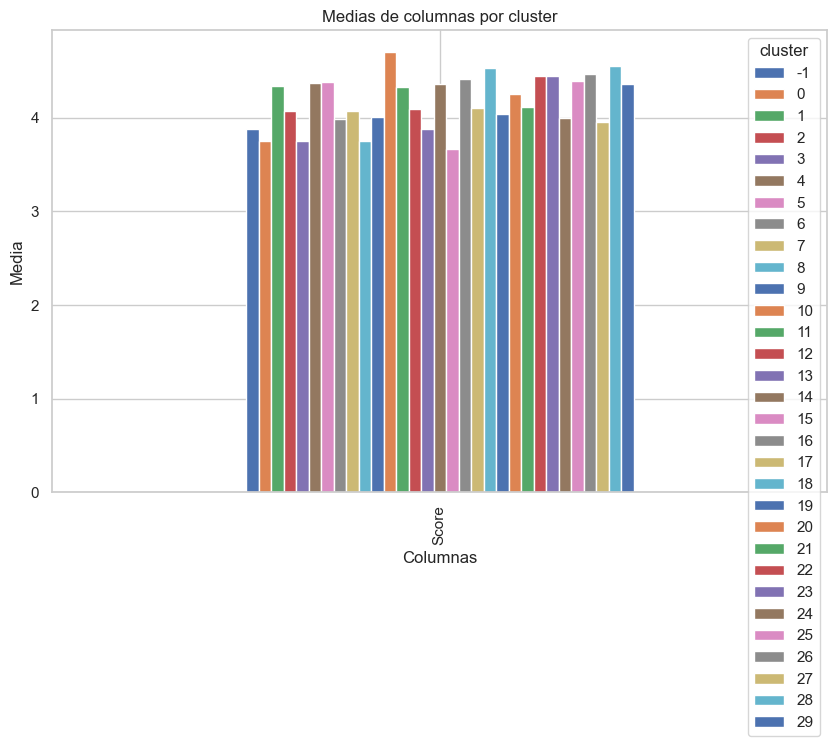

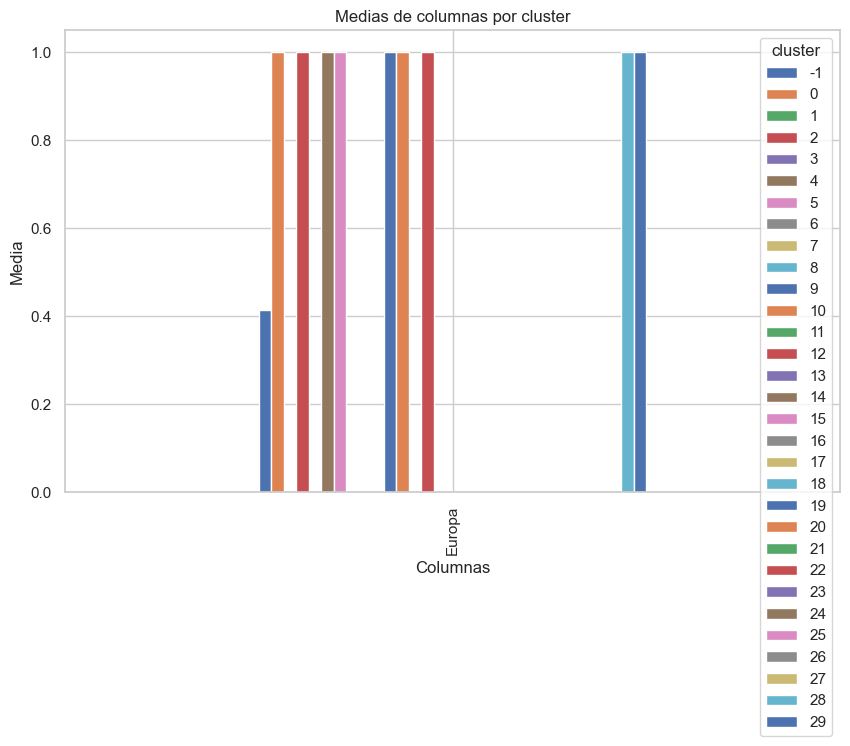

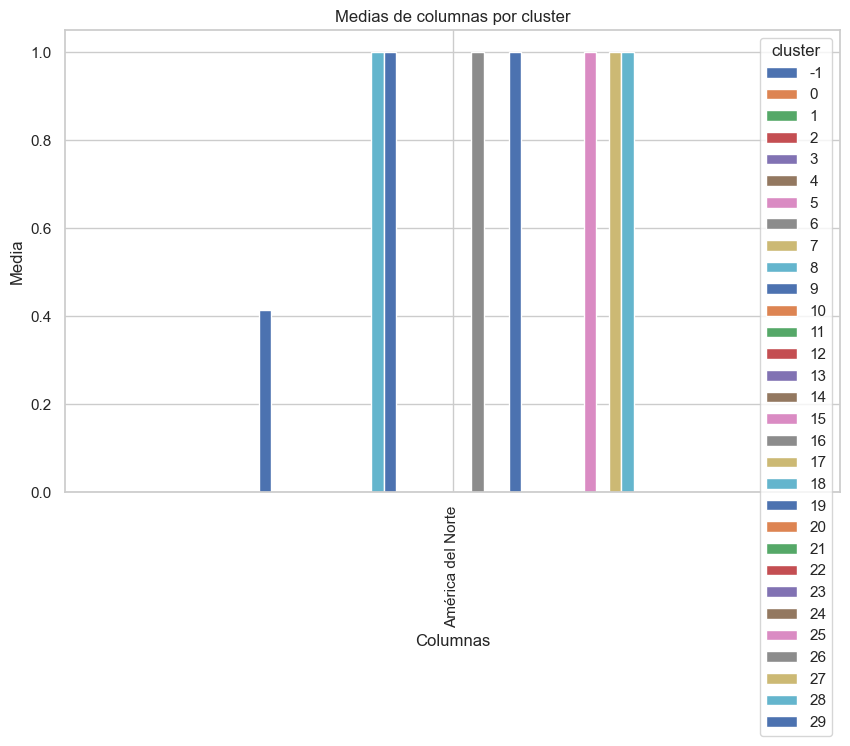

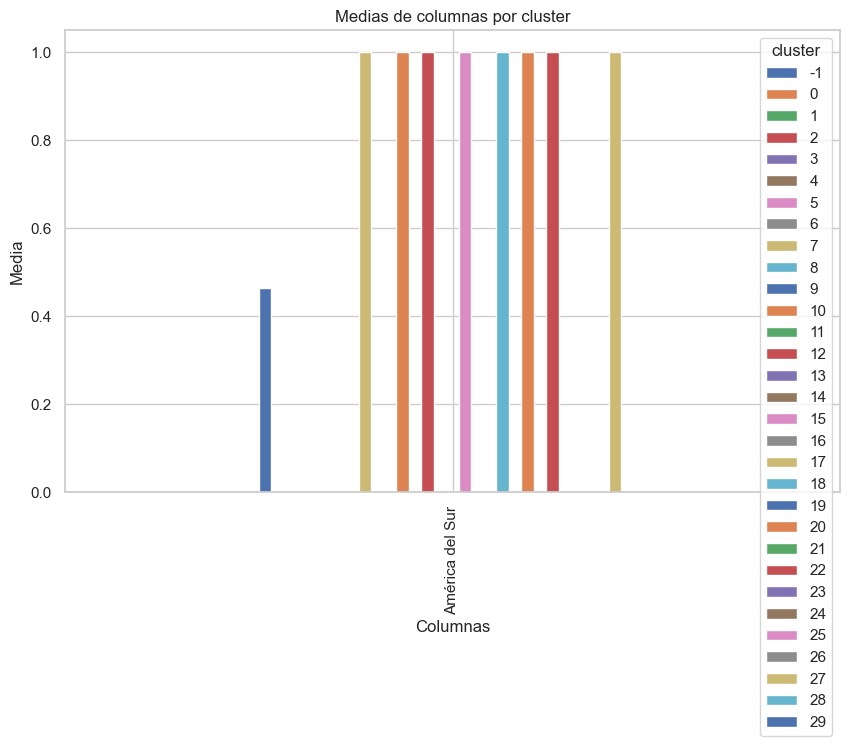

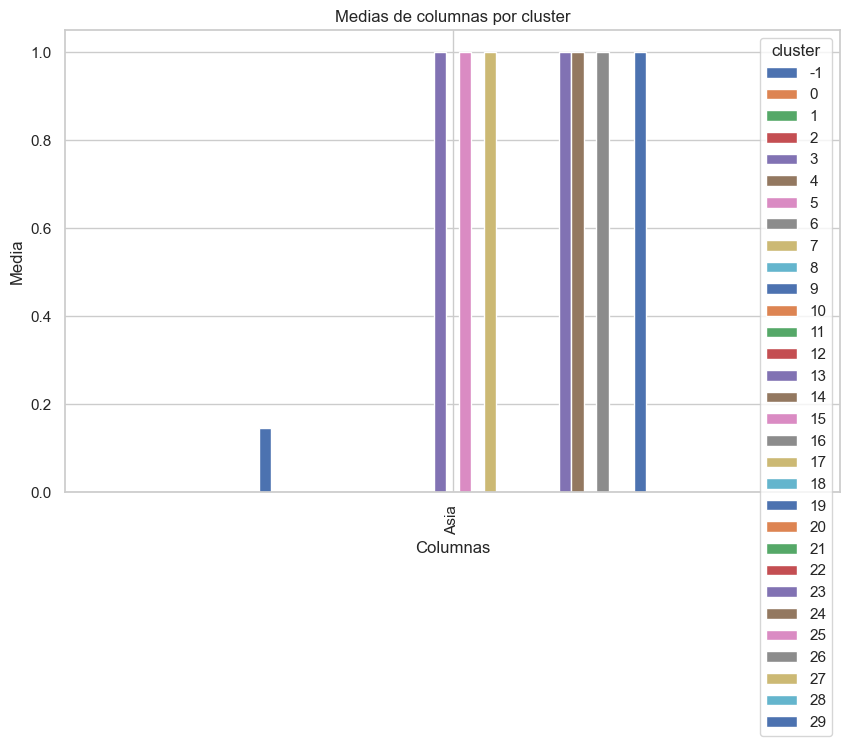

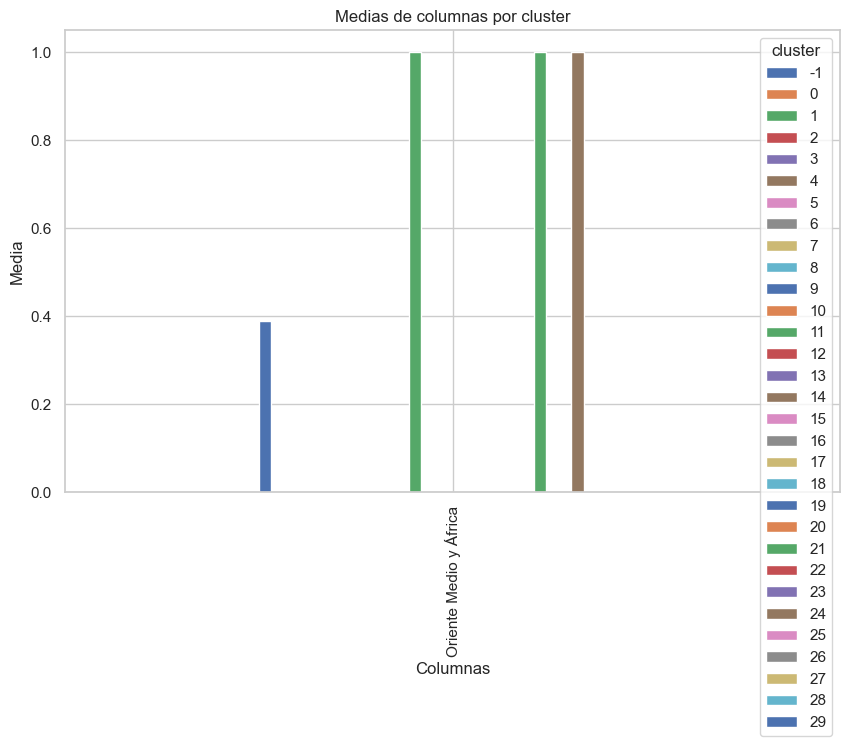

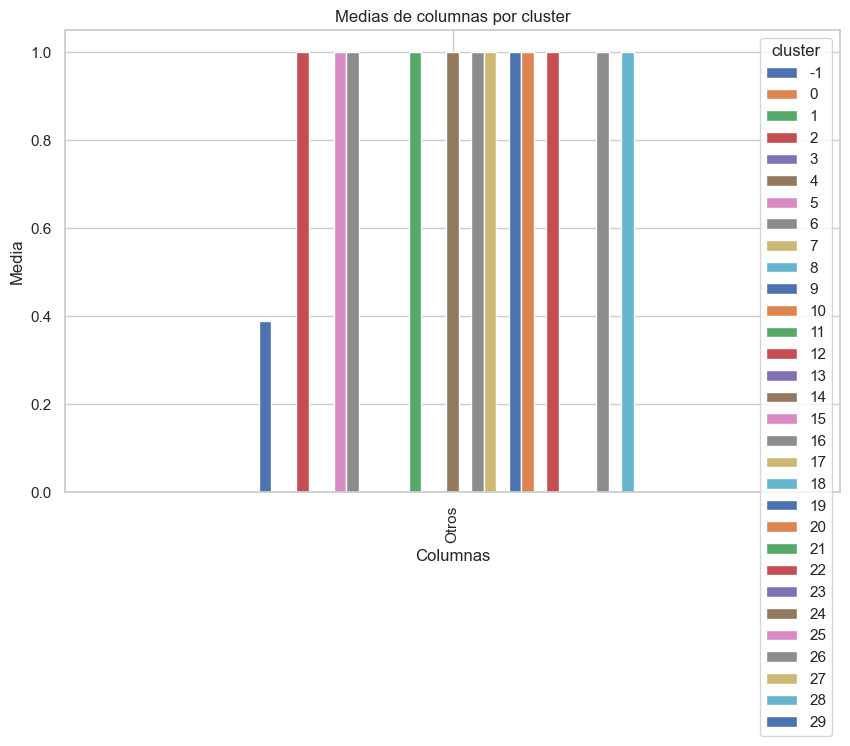

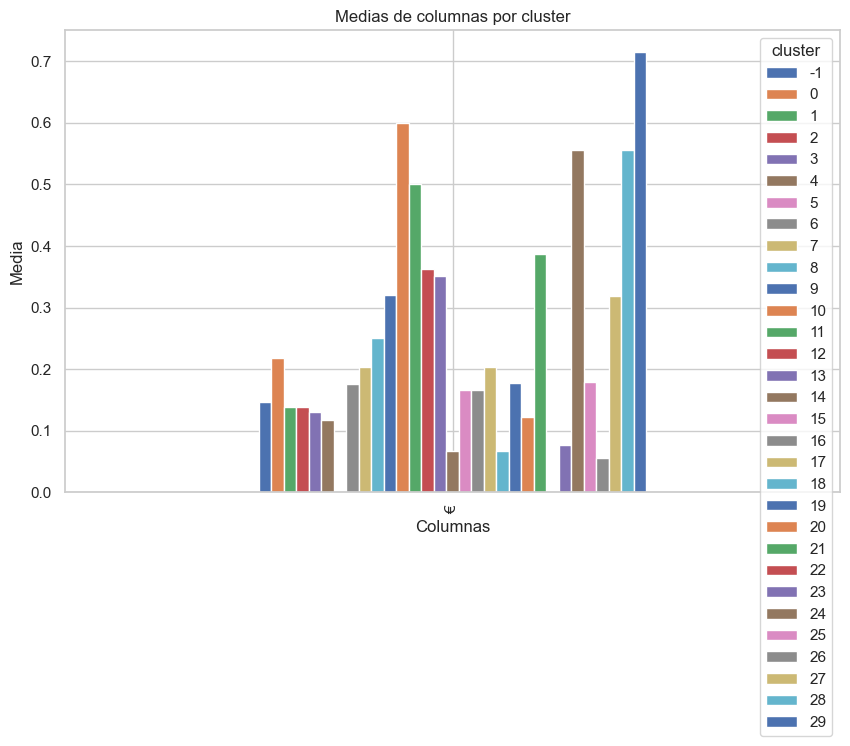

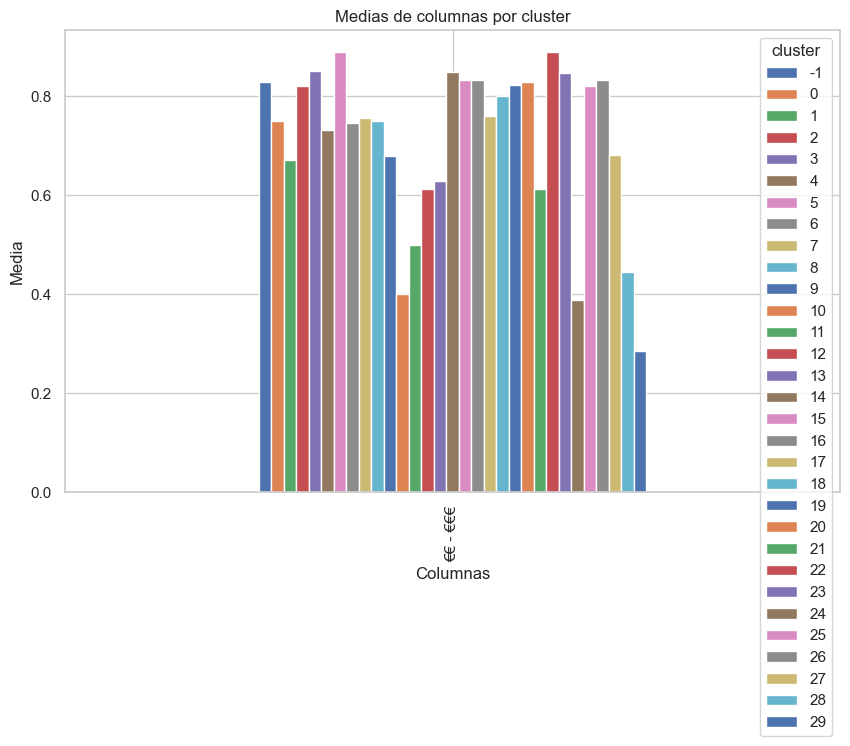

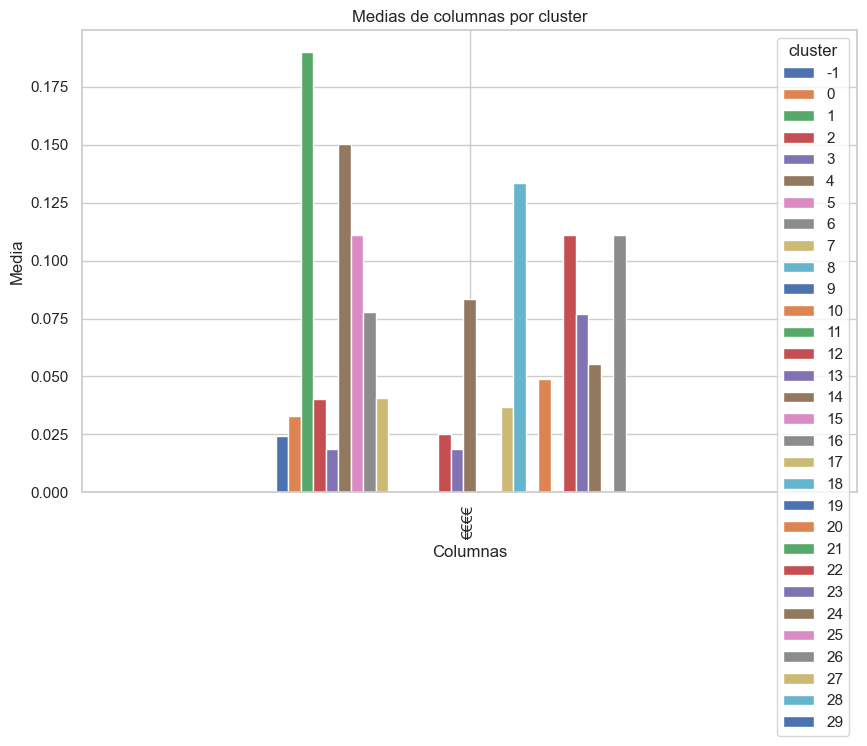

In [86]:
for col in df_clusterizado_1[['Score', 'Europa', 'América del Norte', 'América del Sur', 'Asia', 'Oriente Medio y África', 'Otros', "€", "€€ - €€€", "€€€€"]].columns:
    # Agrupa por la columna de cluster y calcula las medias
    cluster_means = df_clusterizado_1[[col,'cluster']].groupby('cluster').mean()

    # Transpone el DataFrame para facilitar la representación
    cluster_means = cluster_means.T

    # Configura el estilo de seaborn
    sns.set(style="whitegrid")

    # Crea el gráfico de barras agrupadas
    cluster_means.plot(kind='bar', figsize=(10, 6))
    plt.title('Medias de columnas por cluster')
    plt.xlabel('Columnas')
    plt.ylabel('Media')
    plt.show()

### SEGUNDA PRUEBA DBSCAN

In [26]:
X_train_2 = df[["Score", "Excelente", "MuyBueno", "Normal", "Malo", "Pesimo", "Awards", "Europa", "América del Norte",	"América del Sur",	"Asia",	"Oriente Medio y África", "Otros", "€",	"€€ - €€€",	"€€€€"]]

In [27]:
x_2_scaler = MinMaxScaler()
X_train_2 = x_2_scaler.fit_transform(X_train_2)

In [28]:
dbscan = DBSCAN(eps=1.2)
dbscan.fit(X_train_2)
Counter(dbscan.labels_)

Counter({1: 7331, 0: 1750, 2: 328, -1: 1})

In [29]:
df_clusterizado_2 = df.copy()
df_clusterizado_2["cluster"] = dbscan.labels_

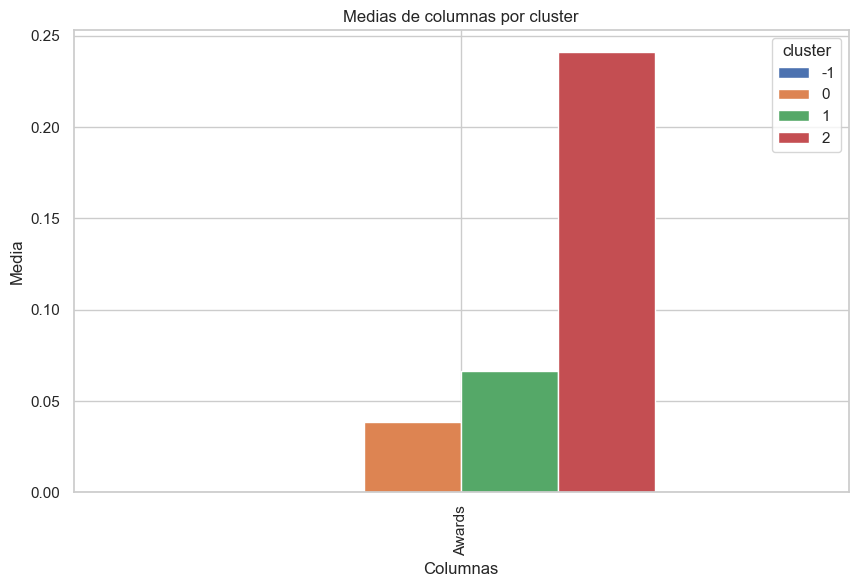

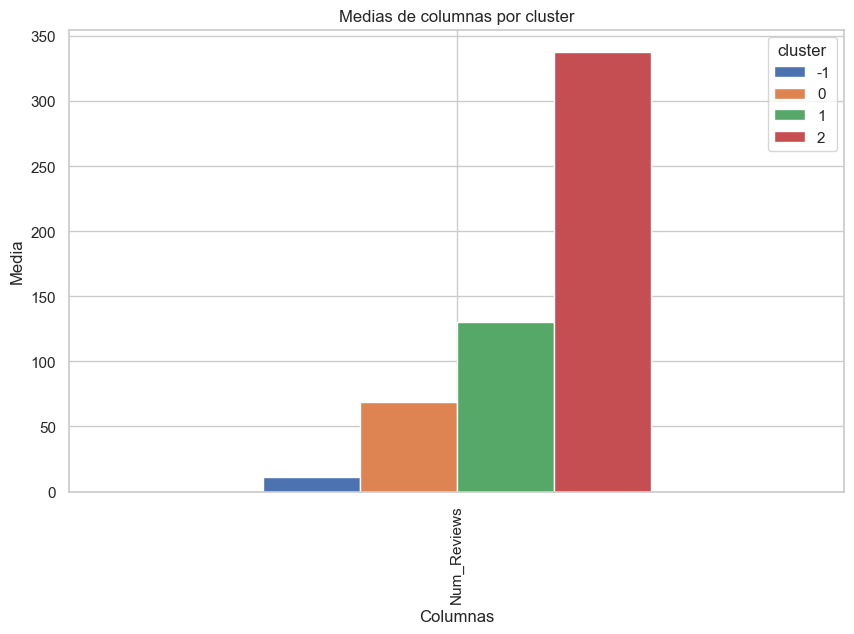

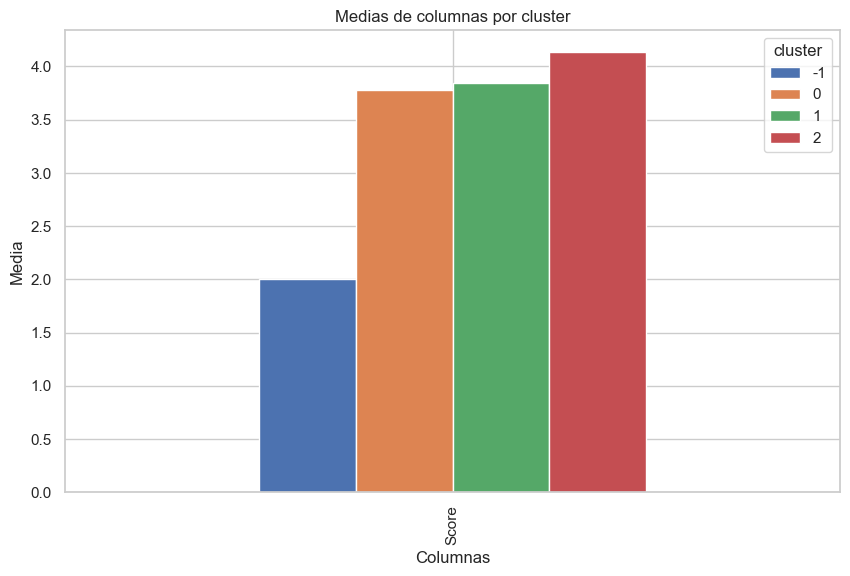

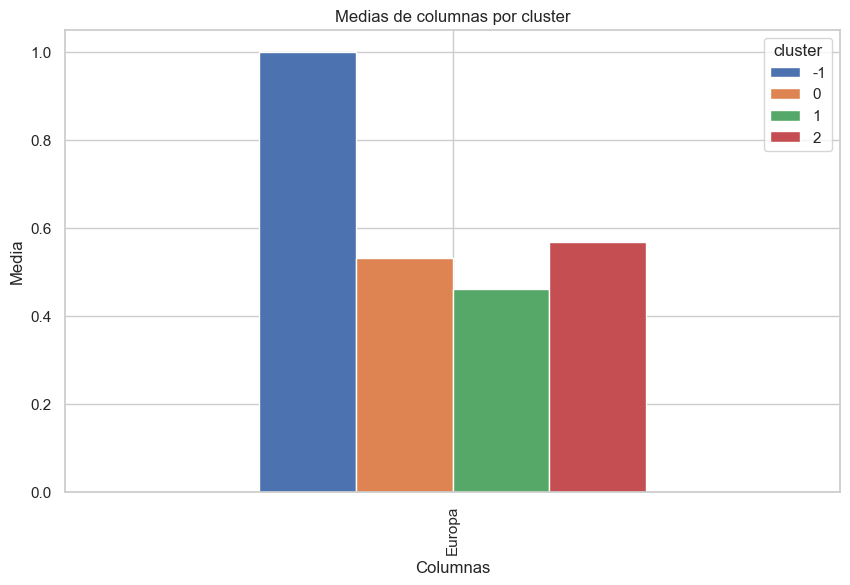

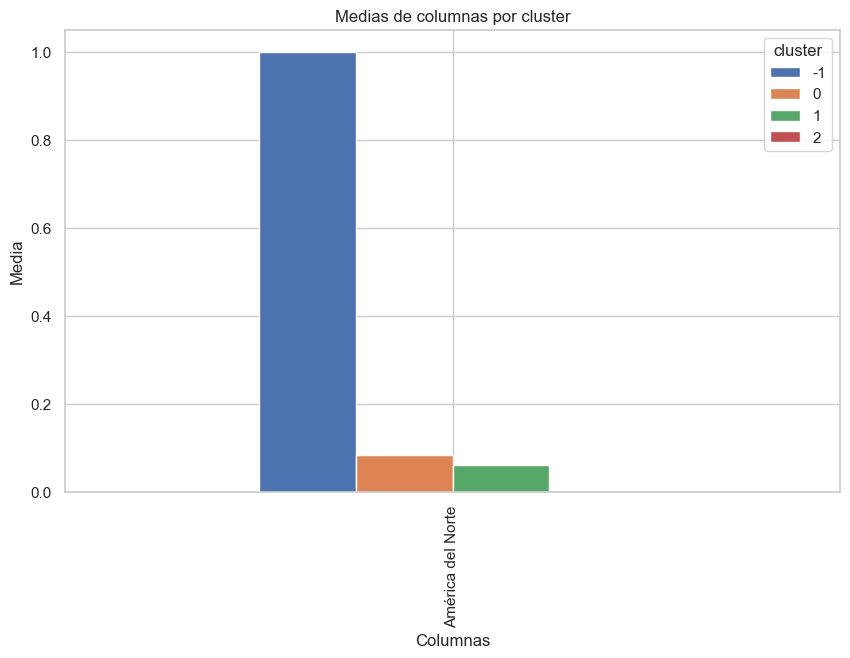

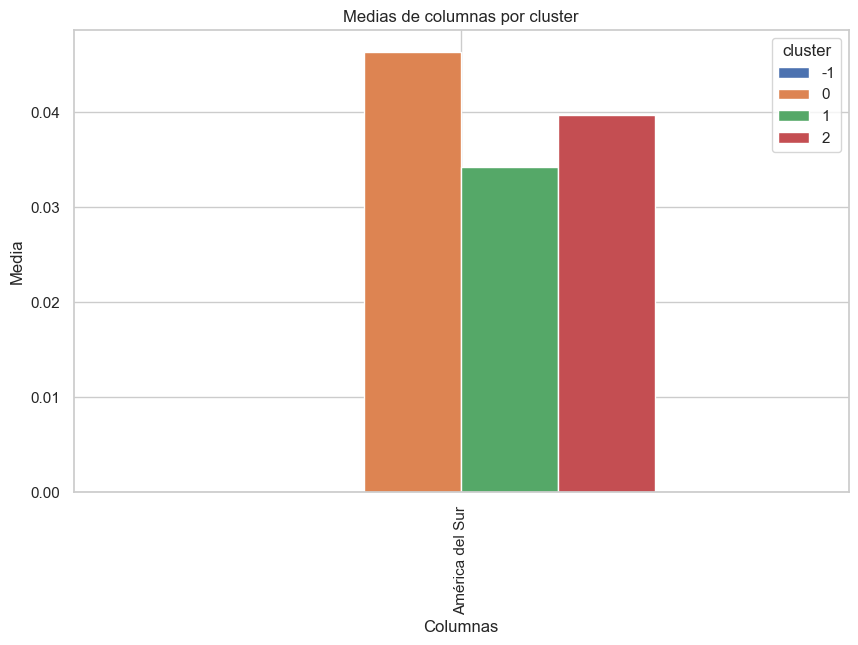

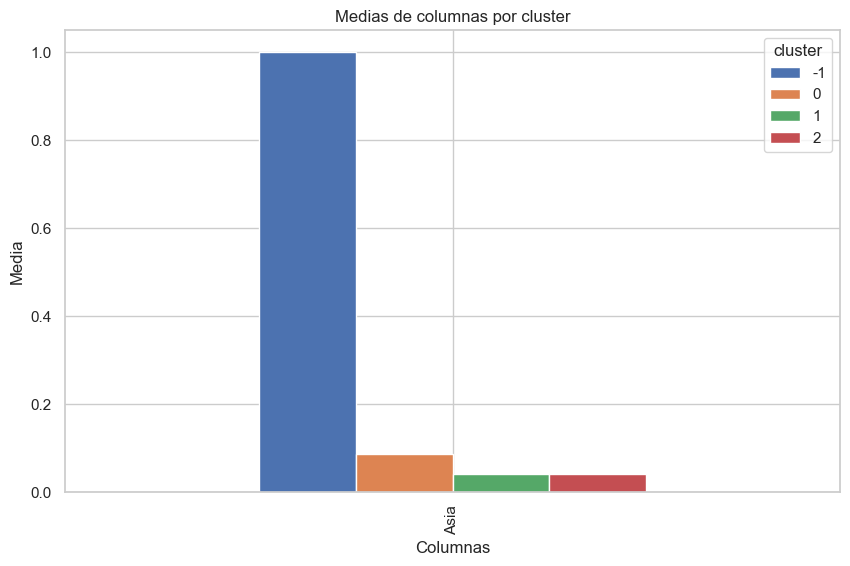

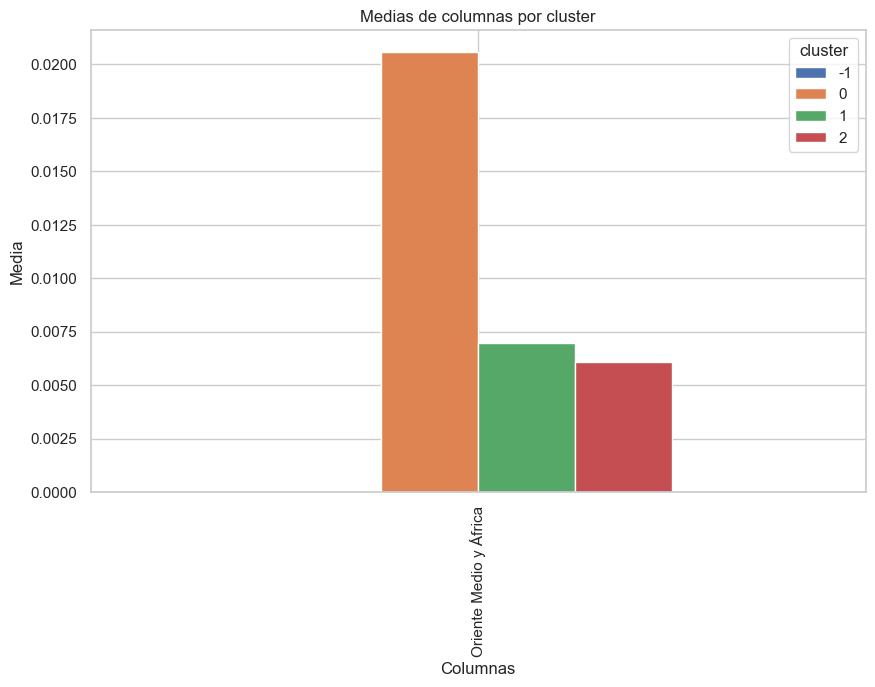

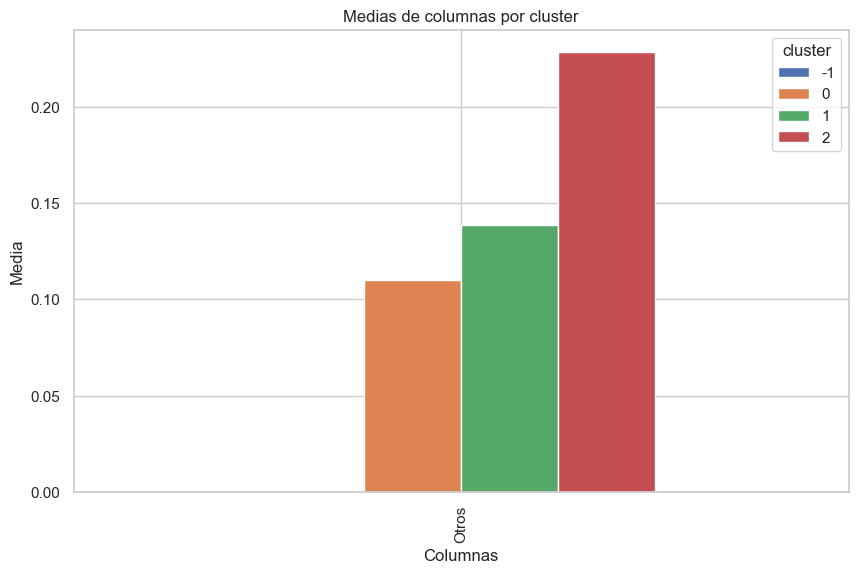

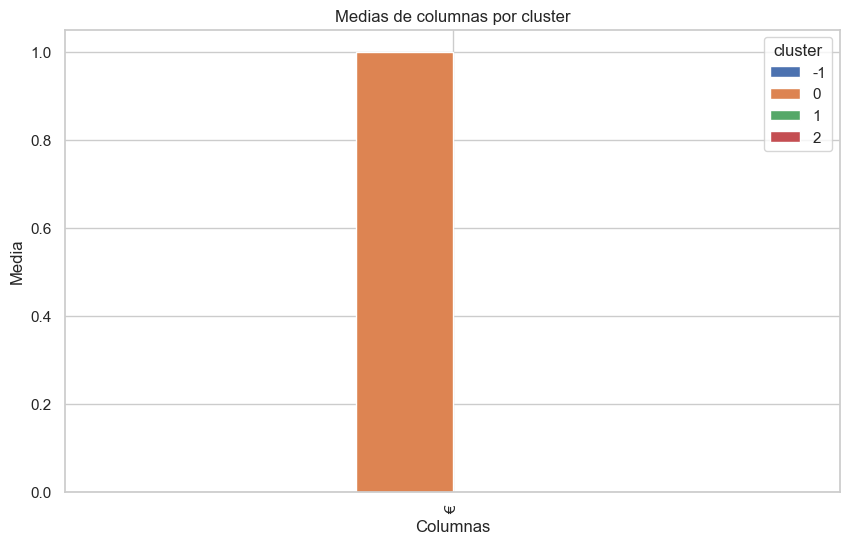

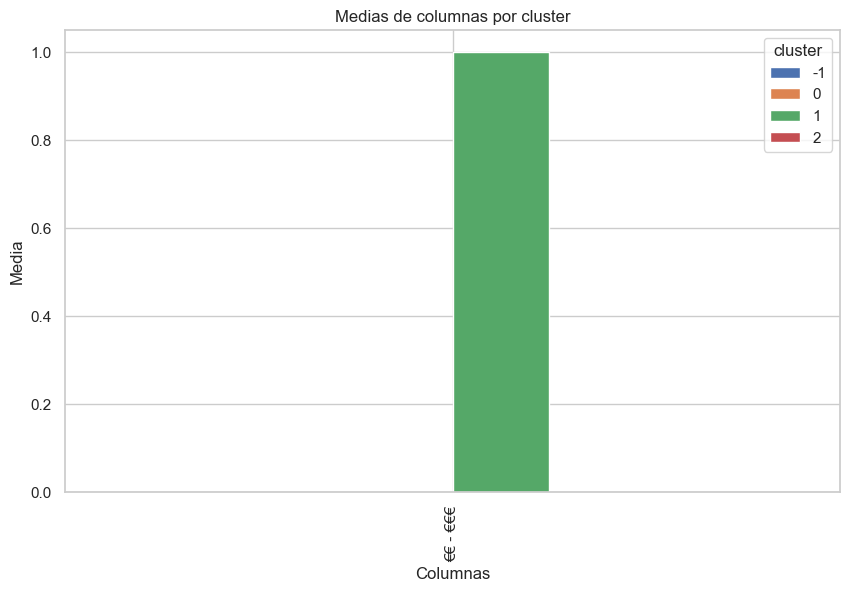

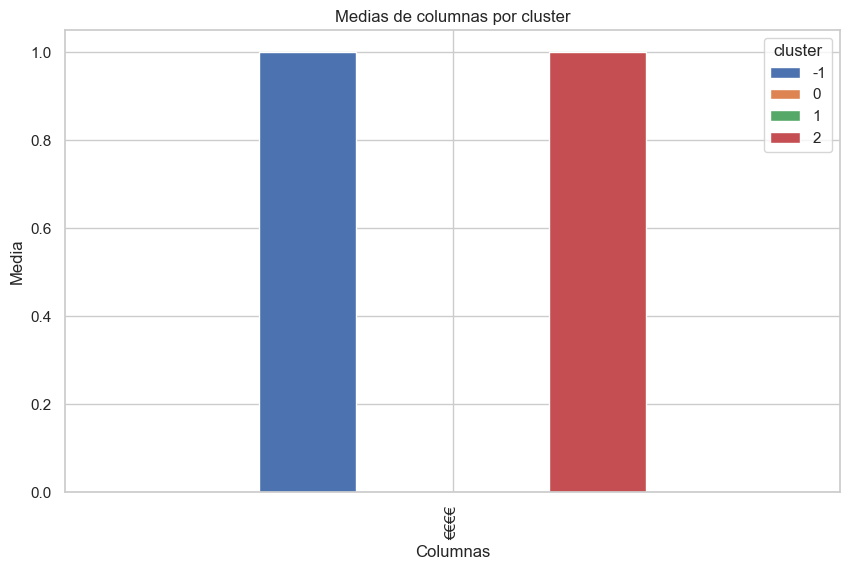

In [31]:
for col in df_clusterizado_2[["Awards", "Num_Reviews", 'Score', 'Europa', 'América del Norte', 'América del Sur', 'Asia', 'Oriente Medio y África', 'Otros', "€", "€€ - €€€", "€€€€"]].columns:
    # Agrupa por la columna de cluster y calcula las medias
    cluster_means = df_clusterizado_2[[col,'cluster']].groupby('cluster').mean()

    # Transpone el DataFrame para facilitar la representación
    cluster_means = cluster_means.T

    # Configura el estilo de seaborn
    sns.set(style="whitegrid")

    # Crea el gráfico de barras agrupadas
    cluster_means.plot(kind='bar', figsize=(10, 6))
    plt.title('Medias de columnas por cluster')
    plt.xlabel('Columnas')
    plt.ylabel('Media')
    plt.show()

### CONCLUSIONES

    · Cluster 0: Rango de precio bajo
    · Cluster 1: Rango de precio medio
    · Cluster 2: Rango de precio alto

### TERCERA PRUEBA DBSCAN

In [32]:
def calculaNumReviews(x)->int:
    if x >=1000:
        return 4
    elif x>=500 and x<1000:
        return 3
    elif x<500 and x>=100:
        return 2
    else:
        return 1

In [33]:
df_clusterizado_3 = df_clusterizado_2.drop("cluster", axis=1).copy()

In [34]:
df_clusterizado_3["Reviews"] = df_clusterizado_2['Num_Reviews_Spain'].apply(lambda x: calculaNumReviews(x))

In [111]:
#df_clusterizado_3.to_csv("df_clusterizado_3.csv")

In [35]:
df_clusterizado_4 = df_clusterizado_2.drop("cluster", axis=1).copy()

In [36]:
df_4 = pd.get_dummies(df['Tipo_Cocina'])
# Concatenar los datos originales con las variables dummy
df_clusterizado_4 = pd.concat([df_clusterizado_4, df_4], axis=1)

In [37]:
df_clusterizado_4.columns.to_list()

['Nombre',
 'Score',
 'Excelente',
 'MuyBueno',
 'Normal',
 'Malo',
 'Pesimo',
 'Num_Reviews',
 'Tipo_Cocina',
 'Awards',
 'Direccion',
 'Web_TripAdvisor',
 'Num_Reviews_Spain',
 'Europa',
 'América del Norte',
 'América del Sur',
 'Asia',
 'Oriente Medio y África',
 'Otros',
 '€',
 '€€ - €€€',
 '€€€€',
 'Total',
 '',
 "'Afgana'",
 "'Africana'",
 "'Africana', 'Bar', 'Café'",
 "'Africana', 'De Oriente Medio', 'Venezolana'",
 "'Africana', 'Etíope', 'Opciones vegetarianas'",
 "'Africana', 'Internacional', 'Mediterránea'",
 "'Africana', 'Marroquí', 'Mediterránea'",
 "'Africana', 'Opciones vegetarianas'",
 "'Africana', 'Saludable', 'Etíope'",
 "'Alemana'",
 "'Alemana', 'Bar'",
 "'Alemana', 'Bar', 'Española'",
 "'Alemana', 'Bar', 'Pub'",
 "'Alemana', 'Belga', 'Pub con cerveza artesanal'",
 "'Alemana', 'Café', 'Mediterránea'",
 "'Alemana', 'Comida rápida', 'Street food / Comida en la calle'",
 "'Alemana', 'Española'",
 "'Alemana', 'Española', 'Sudamericana'",
 "'Alemana', 'Europea'",
 "'Alema

In [38]:
X_train_4 = df_clusterizado_4.drop(["Nombre", "Num_Reviews", "Num_Reviews_Spain", "Web_TripAdvisor", "Direccion", "Tipo_Cocina"], axis=1)

In [39]:
x_4_scaler = MinMaxScaler()
X_train_4 = x_4_scaler.fit_transform(X_train_4)

In [127]:
dbscan = DBSCAN(eps=1.5)
dbscan.fit(X_train_4)
Counter(dbscan.labels_)

Counter({0: 3839,
         1: 3119,
         3: 574,
         2: 458,
         5: 363,
         8: 349,
         4: 163,
         10: 93,
         6: 84,
         7: 84,
         -1: 75,
         9: 71,
         11: 40,
         13: 35,
         12: 34,
         14: 20,
         15: 9})

In [128]:
df_clusterizado_4["cluster"] = dbscan.labels_

In [129]:
#df_clusterizado_4.to_csv("df_clusterizado_4.csv")

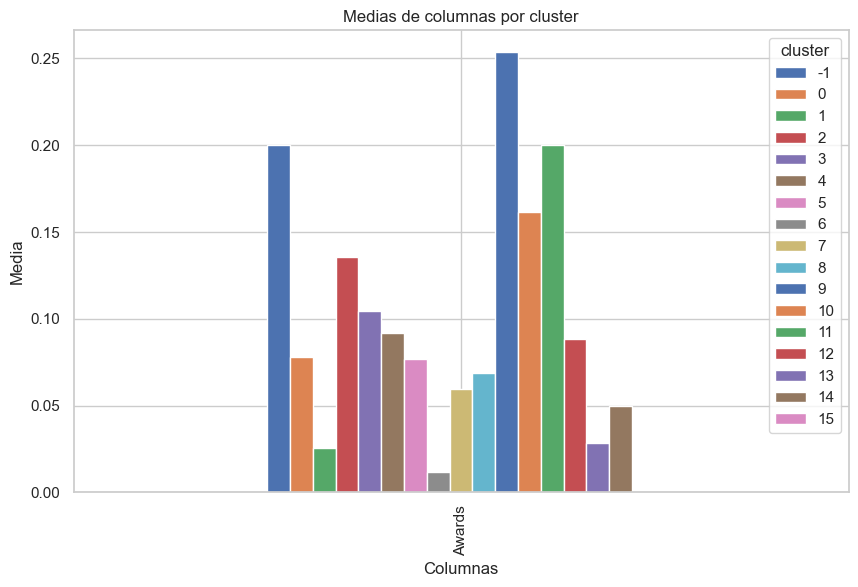

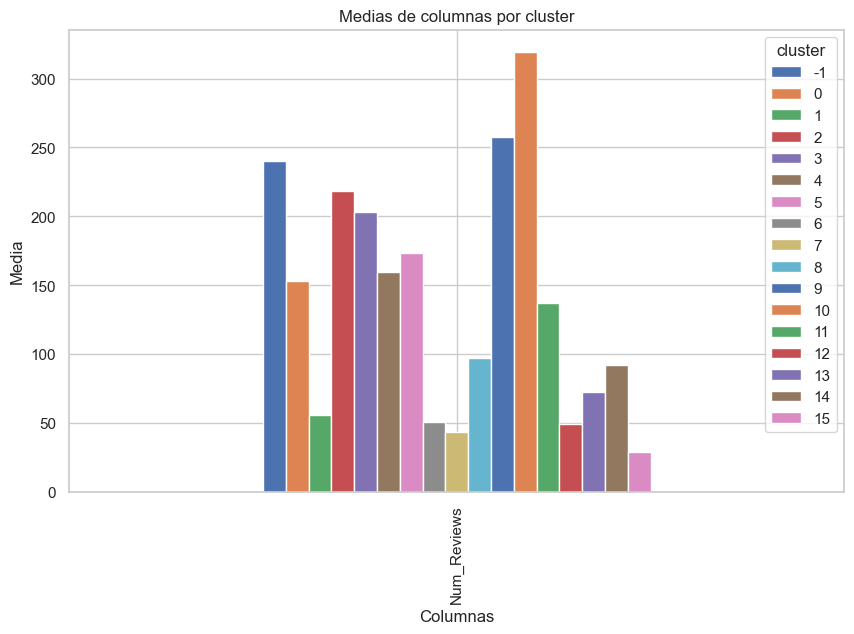

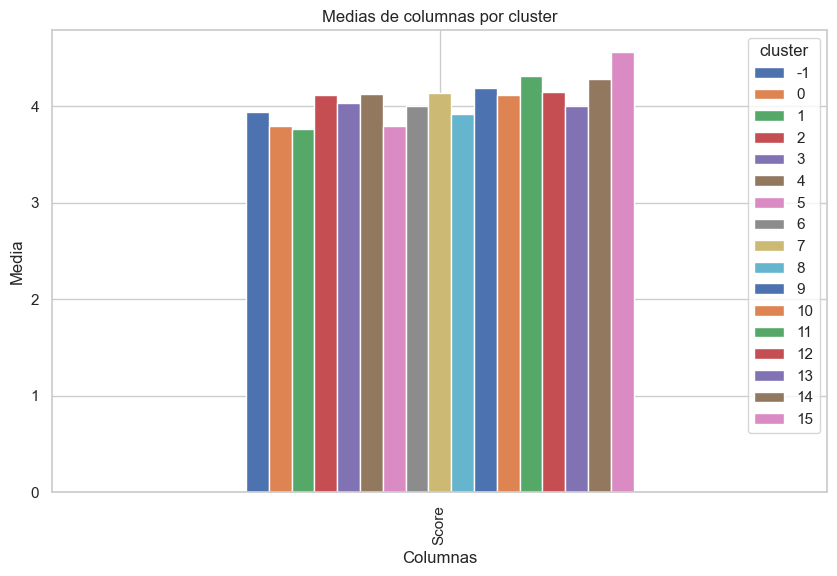

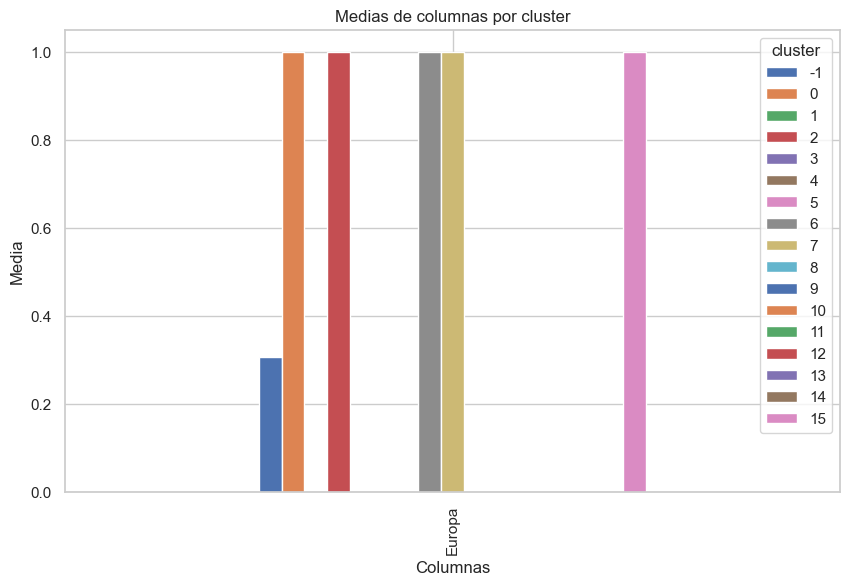

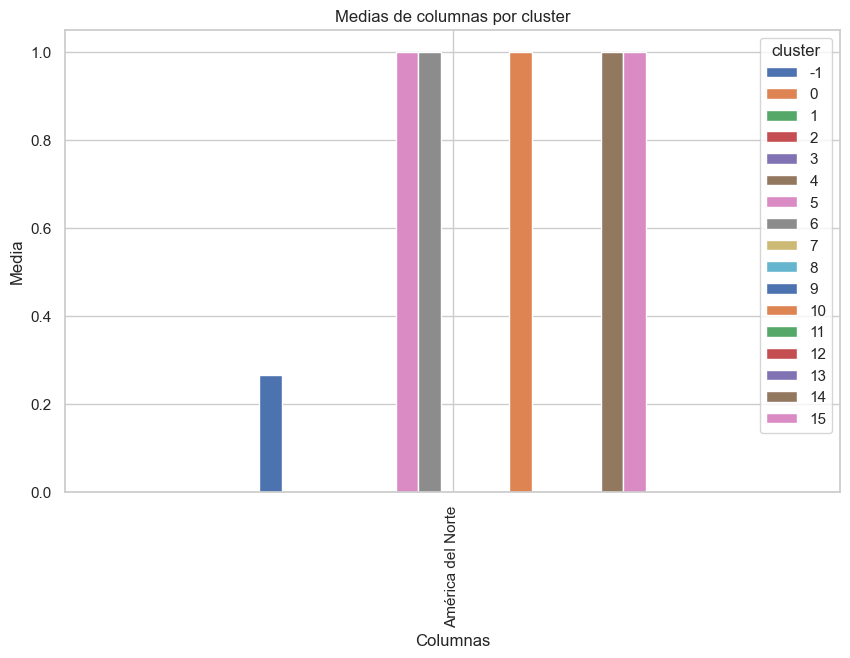

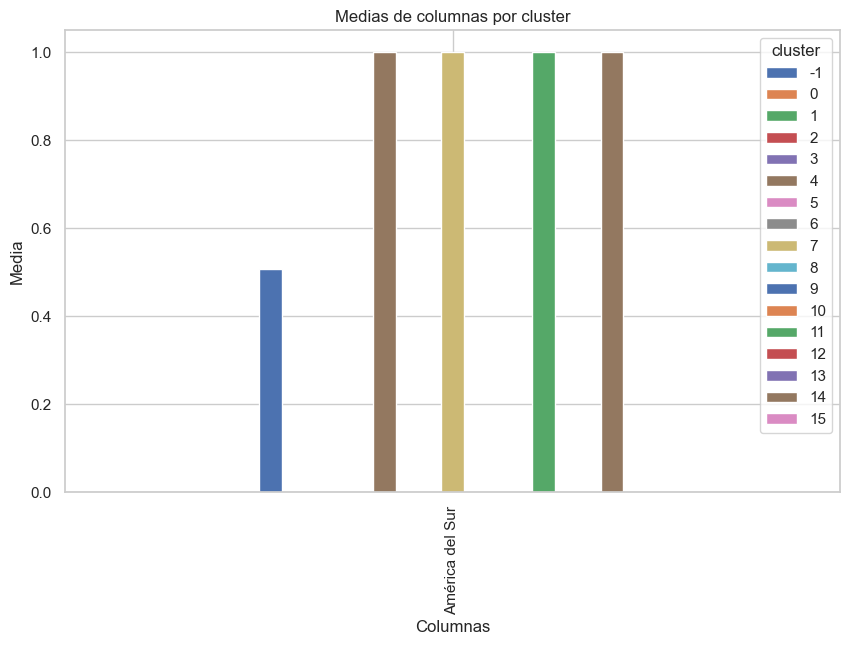

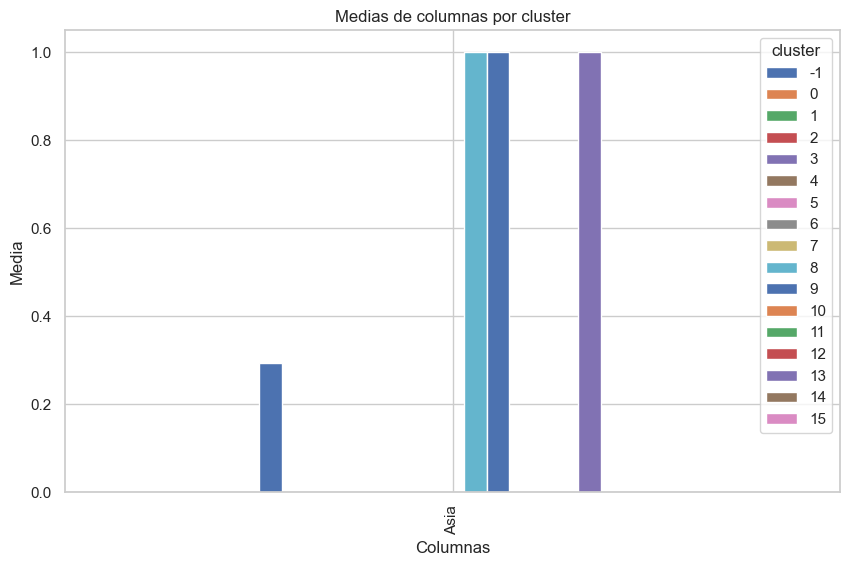

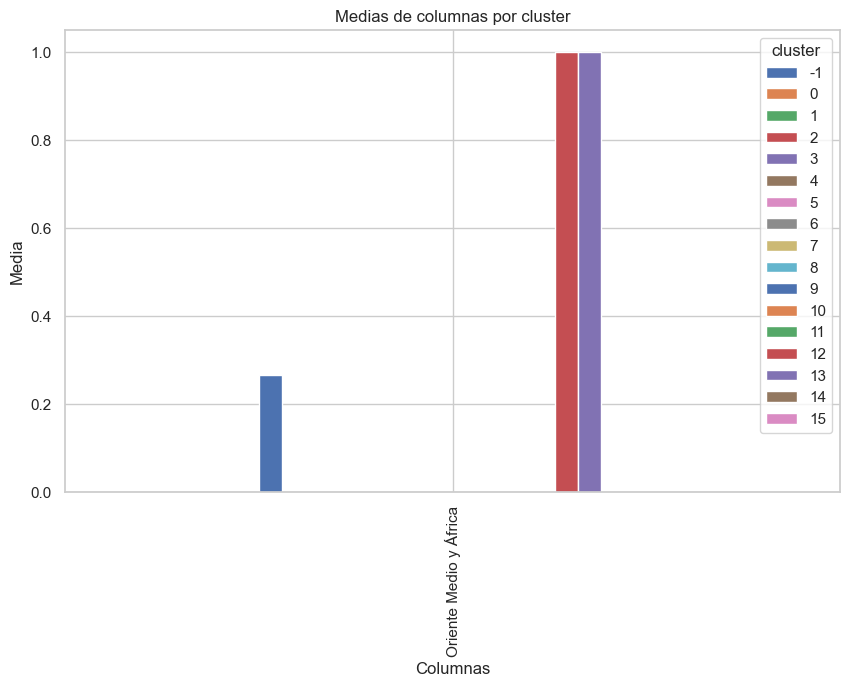

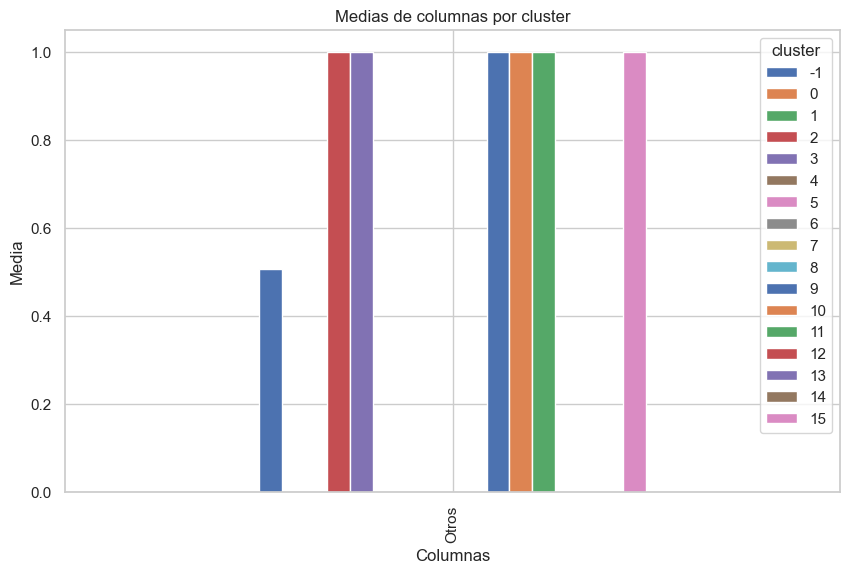

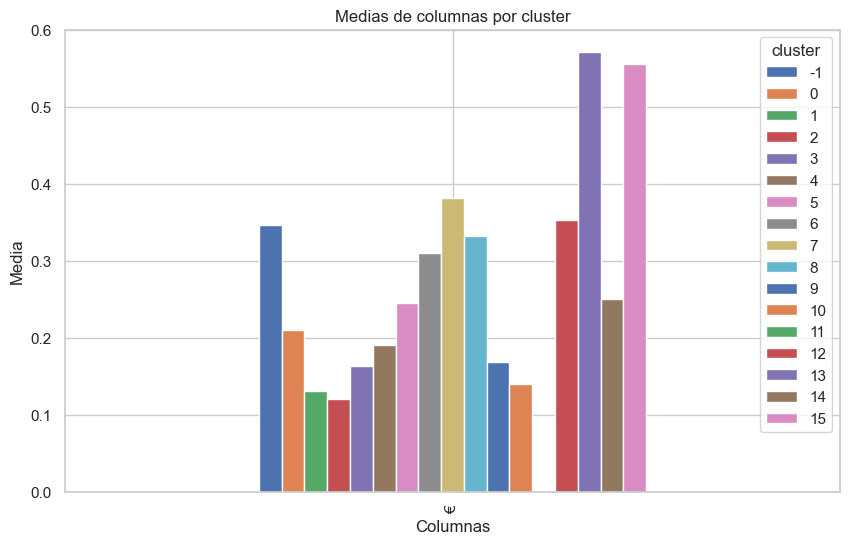

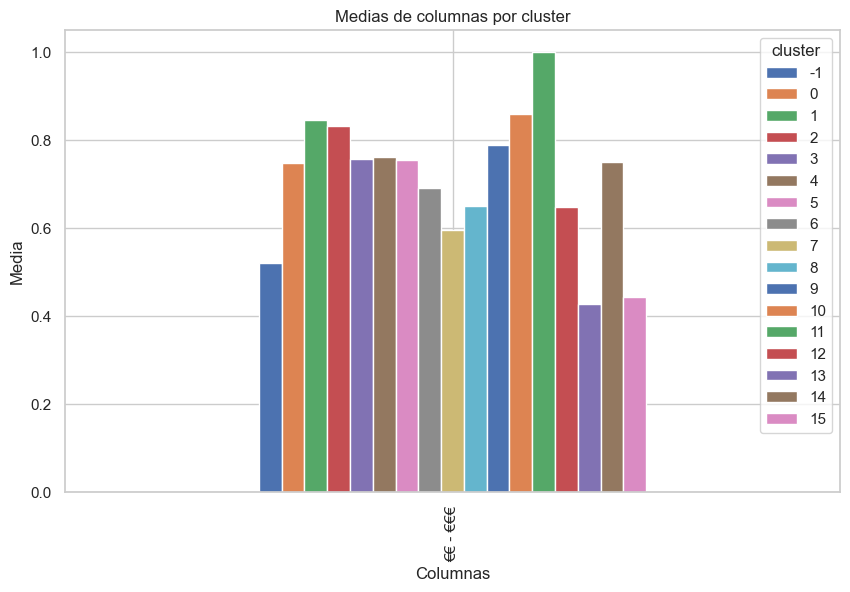

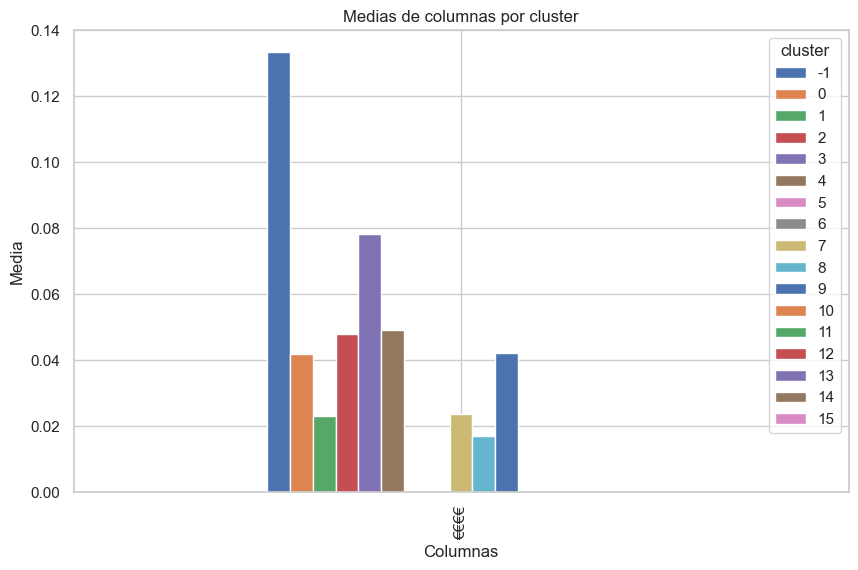

In [130]:
for col in df_clusterizado_4[["Awards", "Num_Reviews", 'Score', 'Europa', 'América del Norte', 'América del Sur', 'Asia', 'Oriente Medio y África', 'Otros', "€", "€€ - €€€", "€€€€"]].columns:
    # Agrupa por la columna de cluster y calcula las medias
    cluster_means = df_clusterizado_4[[col,'cluster']].groupby('cluster').mean()

    # Transpone el DataFrame para facilitar la representación
    cluster_means = cluster_means.T

    # Configura el estilo de seaborn
    sns.set(style="whitegrid")

    # Crea el gráfico de barras agrupadas
    cluster_means.plot(kind='bar', figsize=(10, 6))
    plt.title('Medias de columnas por cluster')
    plt.xlabel('Columnas')
    plt.ylabel('Media')
    plt.show()

### PRIMERA PRUBEA KMEANS

In [41]:
df_clusterizado_2.columns

Index(['Nombre', 'Score', 'Excelente', 'MuyBueno', 'Normal', 'Malo', 'Pesimo',
       'Num_Reviews', 'Tipo_Cocina', 'Awards', 'Direccion', 'Web_TripAdvisor',
       'Num_Reviews_Spain', 'Europa', 'América del Norte', 'América del Sur',
       'Asia', 'Oriente Medio y África', 'Otros', '€', '€€ - €€€', '€€€€',
       'Total', 'cluster'],
      dtype='object')

In [42]:
X_train_5 = df_clusterizado_2.drop(["Nombre", "Total", "cluster", "Num_Reviews", "Num_Reviews_Spain", "Direccion", "Tipo_Cocina", "Web_TripAdvisor"], axis=1)

In [43]:
x_5_scaler = MinMaxScaler()
X_train_5 = x_5_scaler.fit_transform(X_train_5)

In [44]:
inercias = list() 
  
for k in range(1, 11): 
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_train_5)     
    inercias.append(kmeans.inertia_) 

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

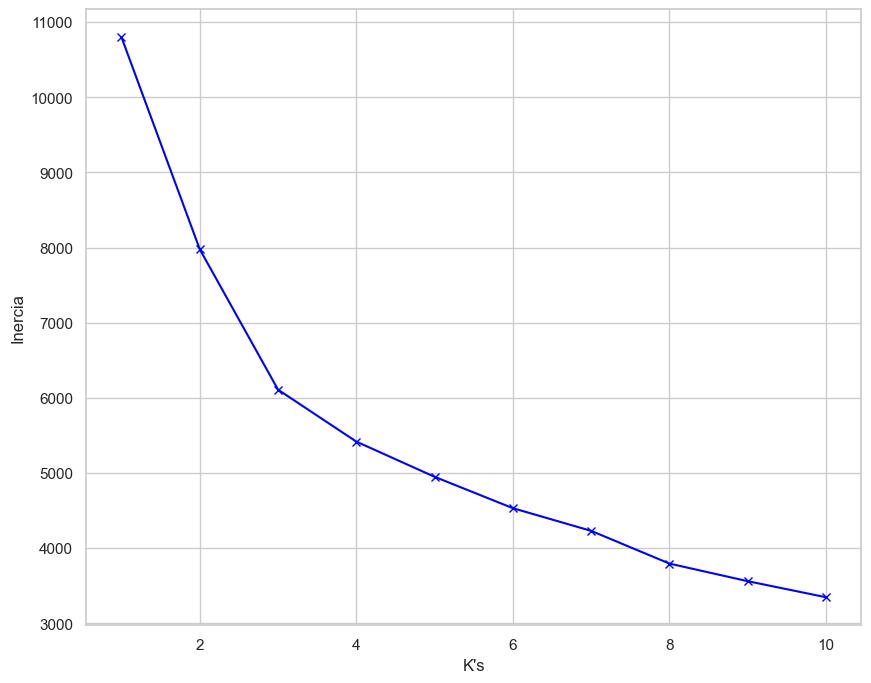

In [143]:
plt.figure(figsize = (10, 8))

plt.plot(range(1, len(inercias) + 1), inercias, marker = "x", color = "blue")

plt.xlabel("K's") 
plt.ylabel("Inercia") 

plt.show()

In [45]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_train_5)

Counter(kmeans.labels_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Counter({1: 4095, 2: 3565, 0: 1750})

In [46]:
df_clusterizado_2["cluster_kmeans"] = kmeans.labels_

In [47]:
df_clusterizado_2.to_csv("../proyecto2/Data/df_clusterizado_2.csv")

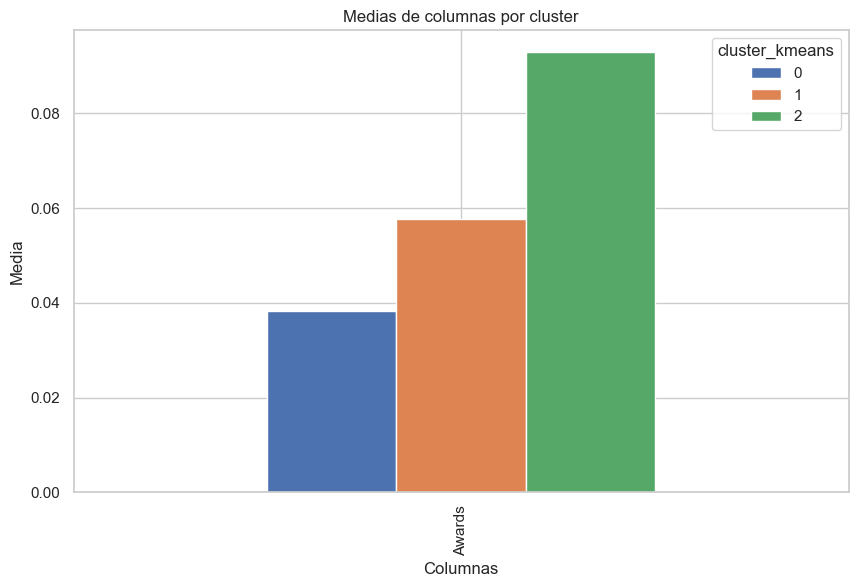

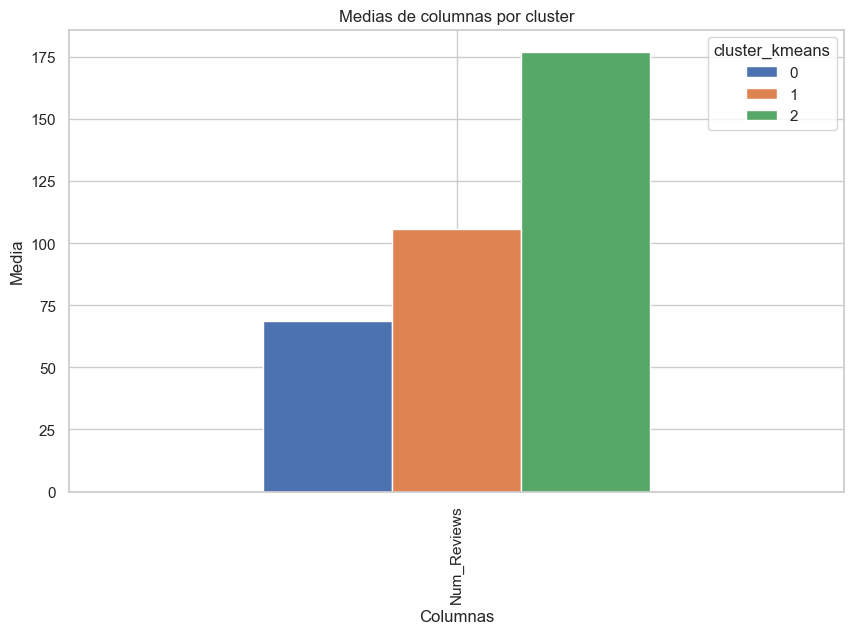

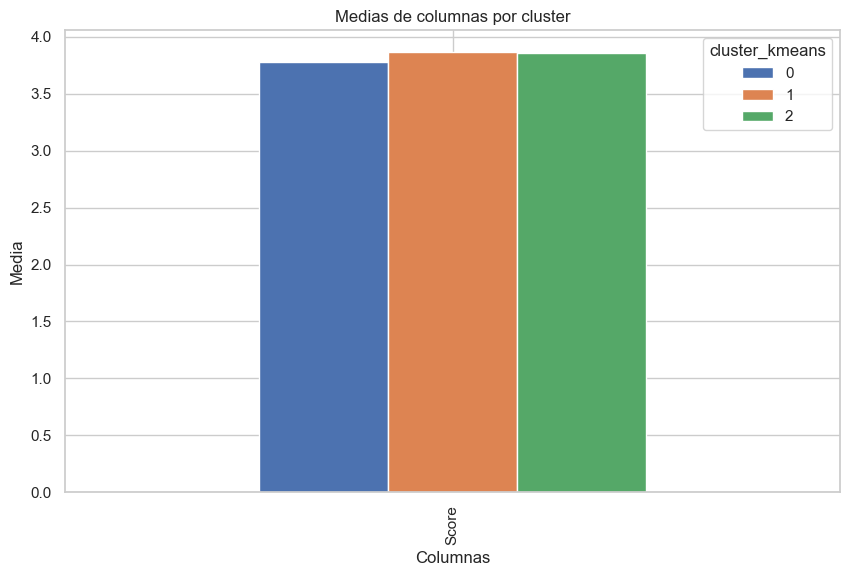

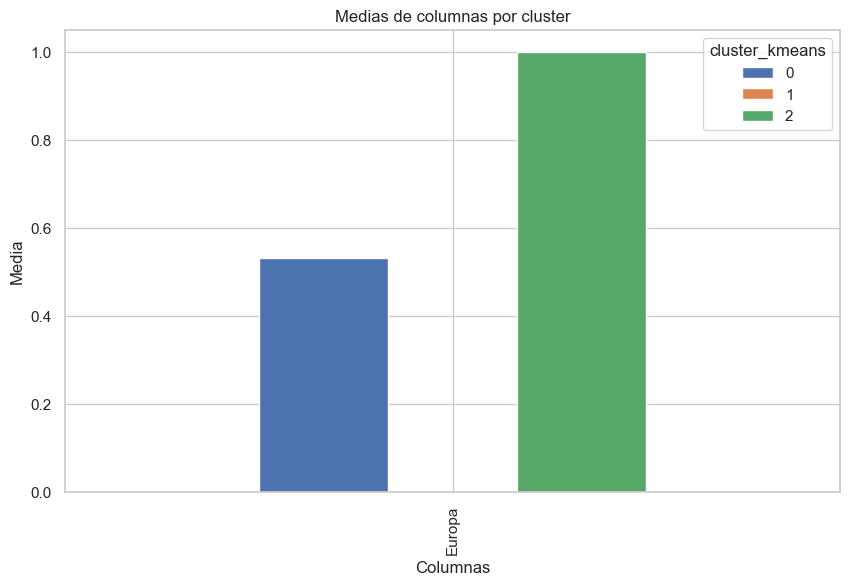

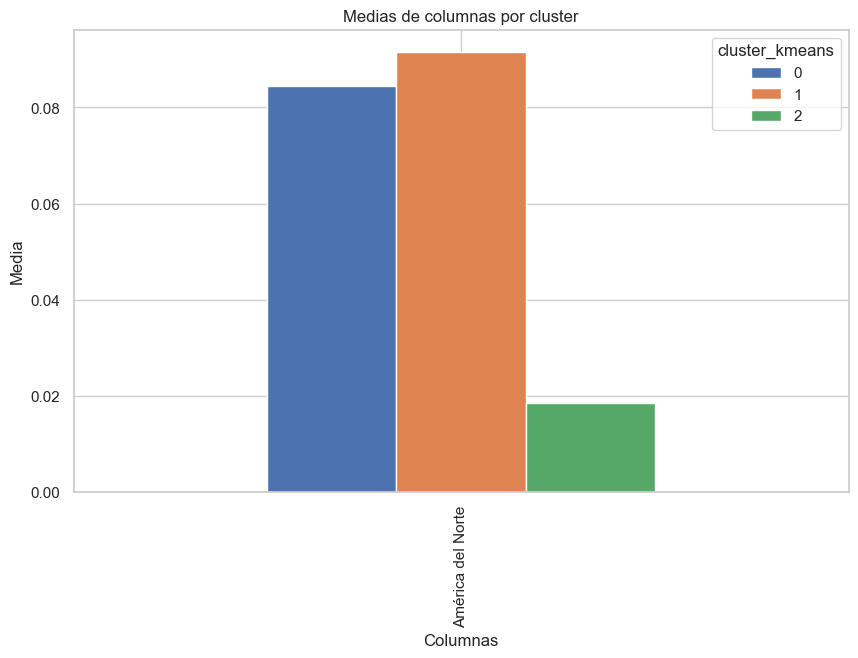

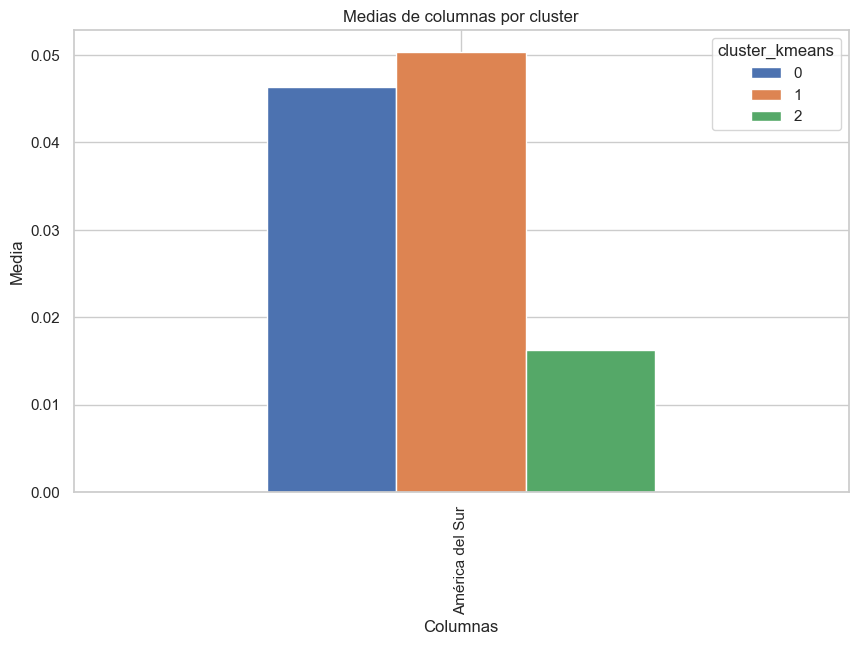

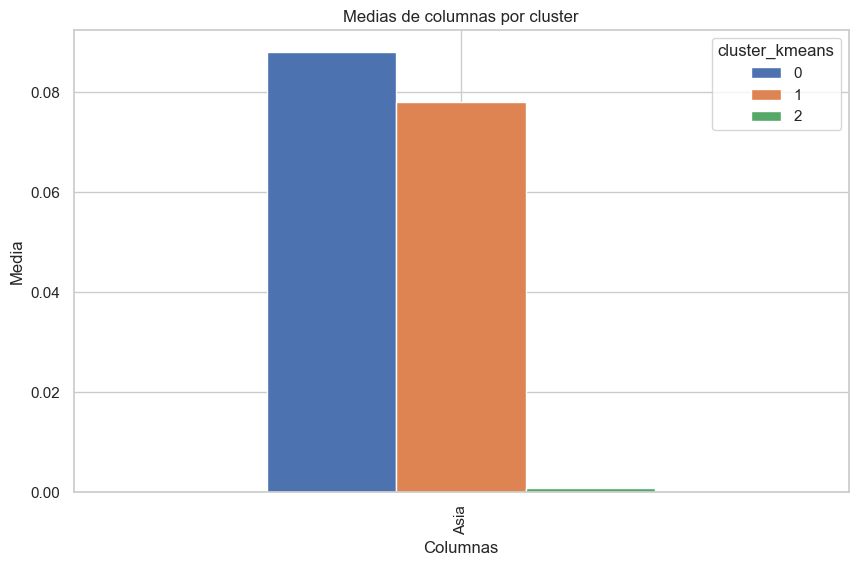

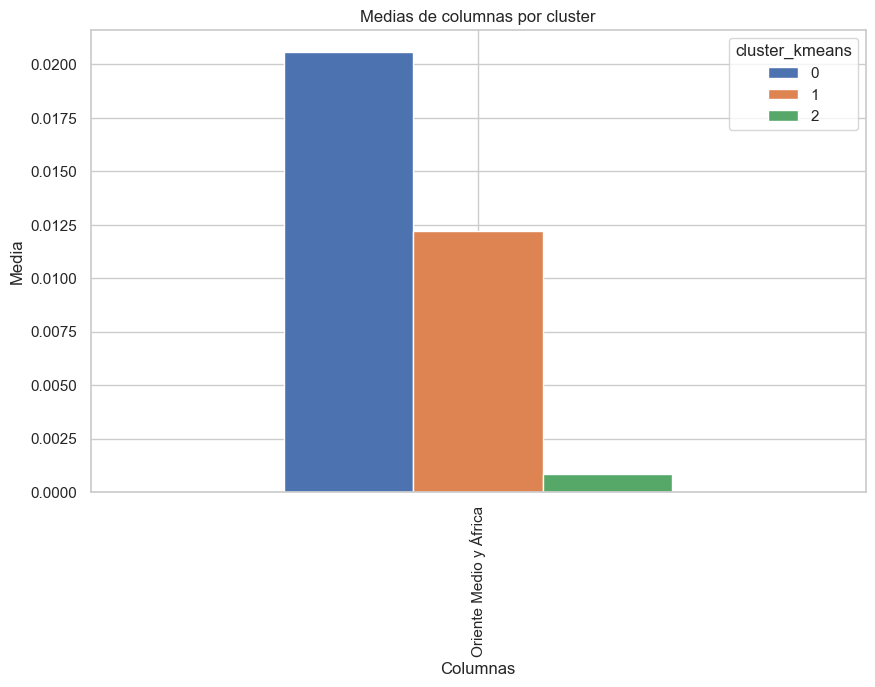

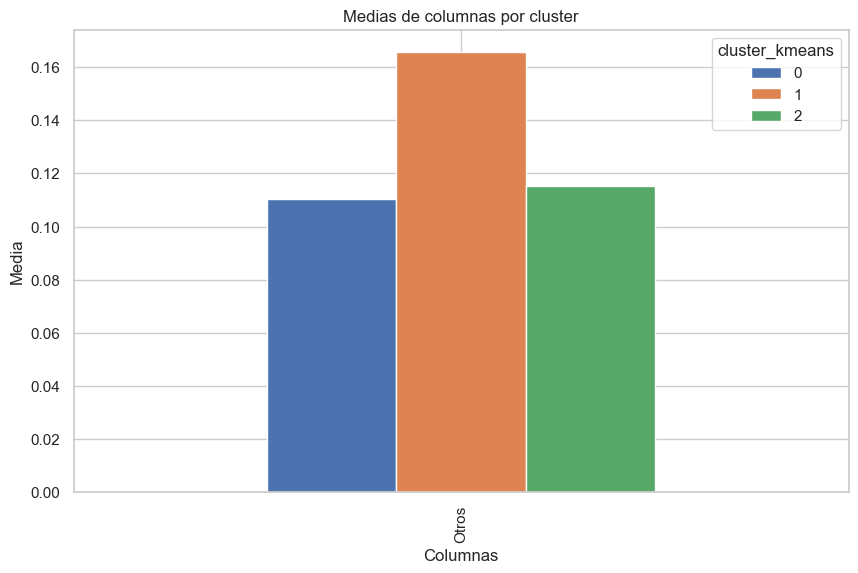

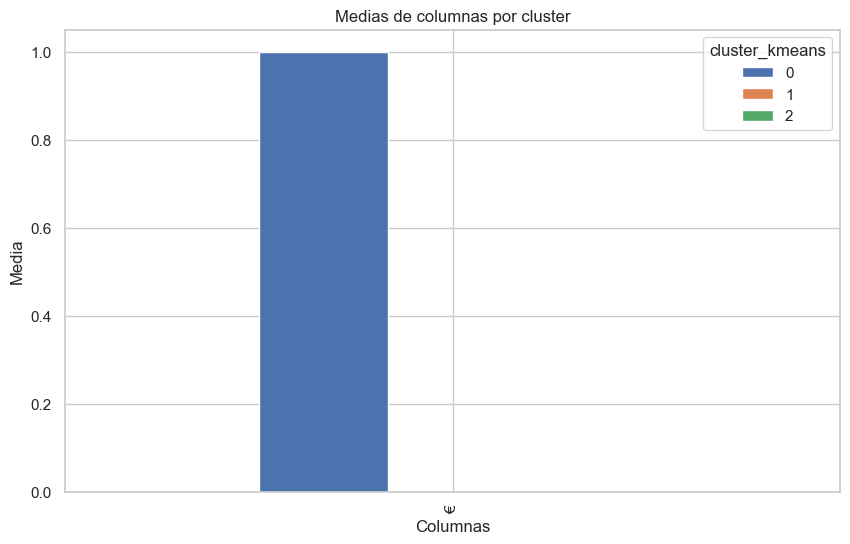

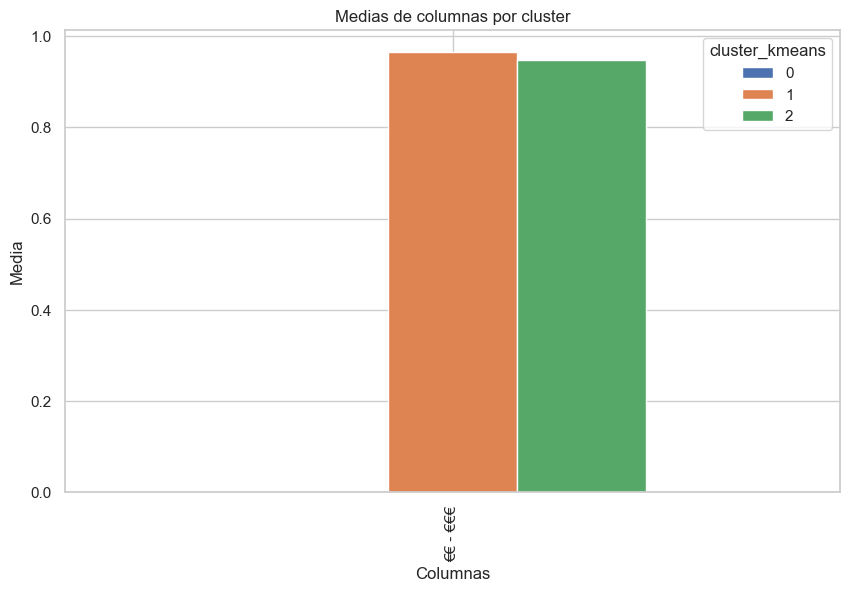

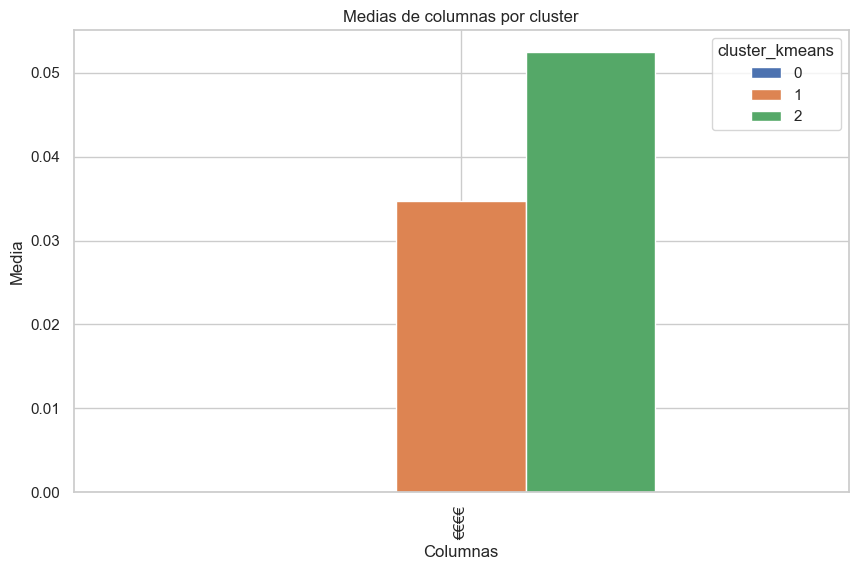

In [48]:
for col in df_clusterizado_2[["Awards", "Num_Reviews", 'Score', 'Europa', 'América del Norte', 'América del Sur', 'Asia', 'Oriente Medio y África', 'Otros', "€", "€€ - €€€", "€€€€"]].columns:
    # Agrupa por la columna de cluster y calcula las medias
    cluster_means = df_clusterizado_2[[col,'cluster_kmeans']].groupby('cluster_kmeans').mean()

    # Transpone el DataFrame para facilitar la representación
    cluster_means = cluster_means.T

    # Configura el estilo de seaborn
    sns.set(style="whitegrid")

    # Crea el gráfico de barras agrupadas
    cluster_means.plot(kind='bar', figsize=(10, 6))
    plt.title('Medias de columnas por cluster')
    plt.xlabel('Columnas')
    plt.ylabel('Media')
    plt.show()

### SEGUNDA PRUEBA KMEANS

In [ ]:
kmeans = KMeans(n_clusters = 8)
kmeans.fit(X_train_5)

Counter(kmeans.labels_)

In [ ]:
df_clusterizado_2["cluster_kmeans_2"] = kmeans.labels_

In [ ]:
for col in df_clusterizado_2[["Awards", "Num_Reviews", 'Score', 'Europa', 'América del Norte', 'América del Sur', 'Asia', 'Oriente Medio y África', 'Otros', "€", "€€ - €€€", "€€€€"]].columns:
    # Agrupa por la columna de cluster y calcula las medias
    cluster_means = df_clusterizado_2[[col,'cluster_kmeans_2']].groupby('cluster_kmeans_2').mean()

    # Transpone el DataFrame para facilitar la representación
    cluster_means = cluster_means.T

    # Configura el estilo de seaborn
    sns.set(style="whitegrid")

    # Crea el gráfico de barras agrupadas
    cluster_means.plot(kind='bar', figsize=(10, 6))
    plt.title('Medias de columnas por cluster')
    plt.xlabel('Columnas')
    plt.ylabel('Media')
    plt.show()

### PRIMERA PRUEBA HIERARCHICAL

In [155]:
from sklearn.cluster import AgglomerativeClustering

In [156]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = "complete")
agglom.fit(X_train_5)
Counter(agglom.labels_)

Counter({0: 7342, 2: 1941, 1: 127})

In [157]:
df_clusterizado_2["cluster_hierarchical"] = agglom.labels_

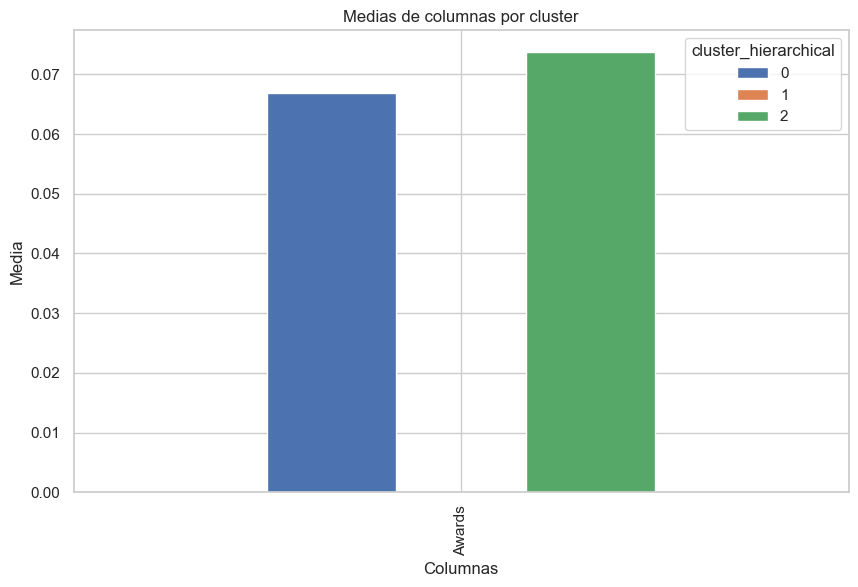

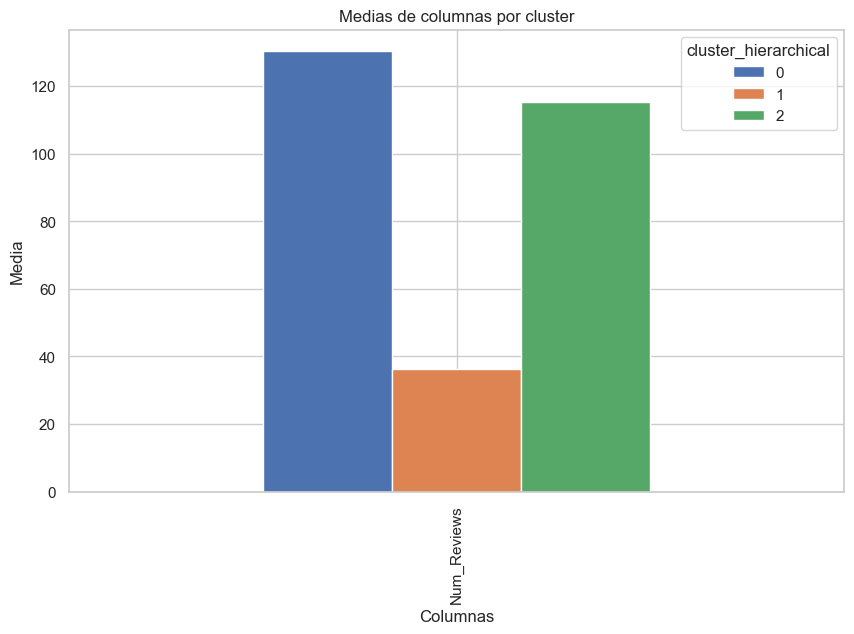

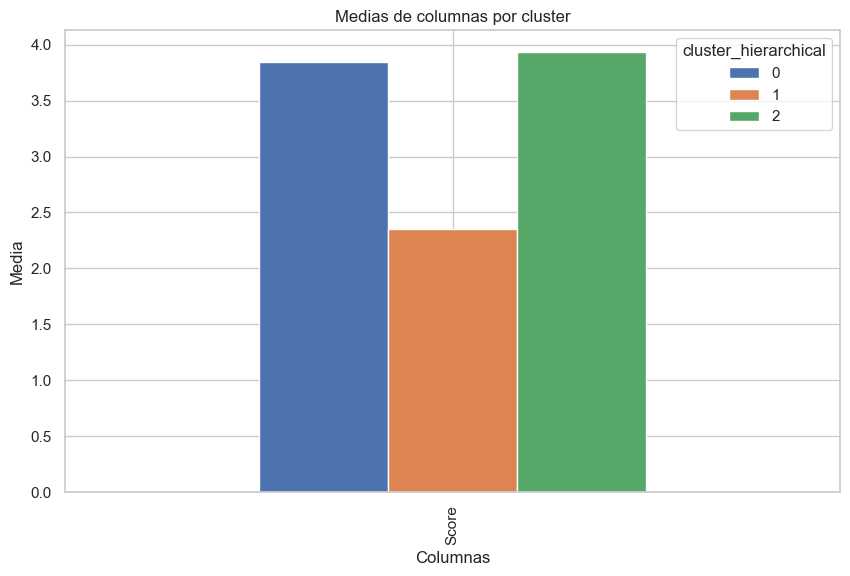

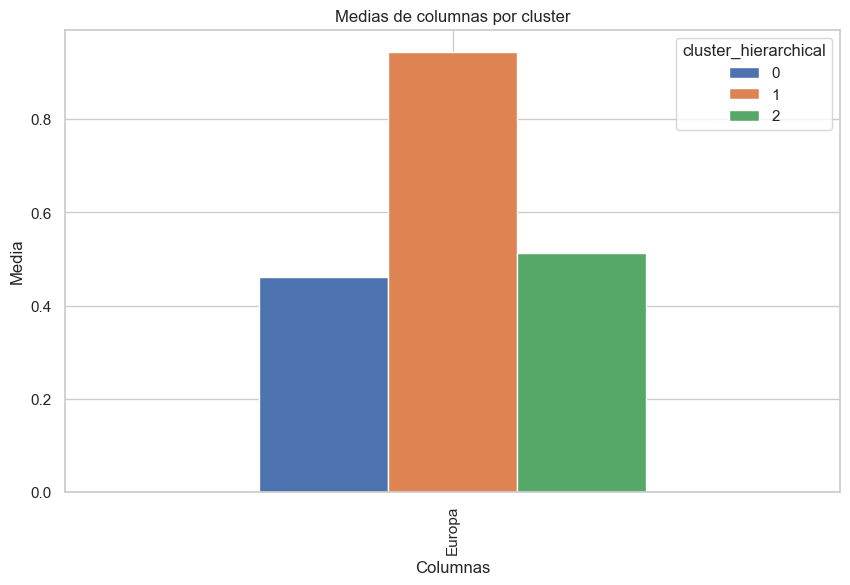

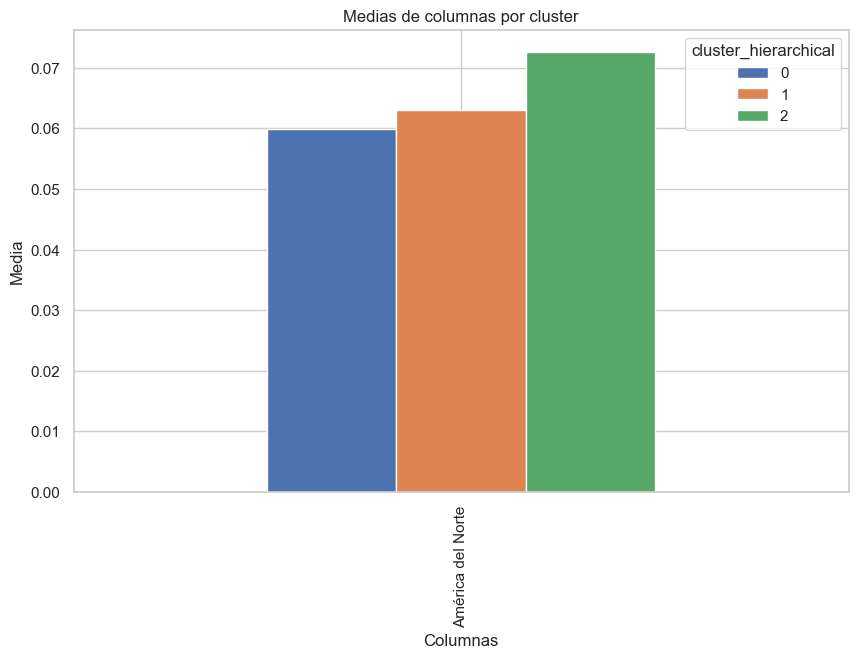

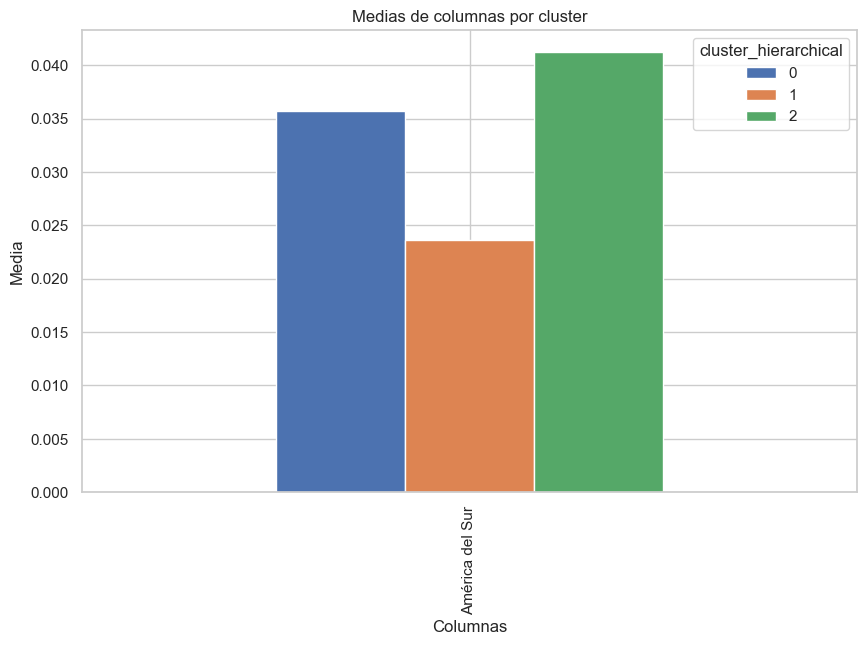

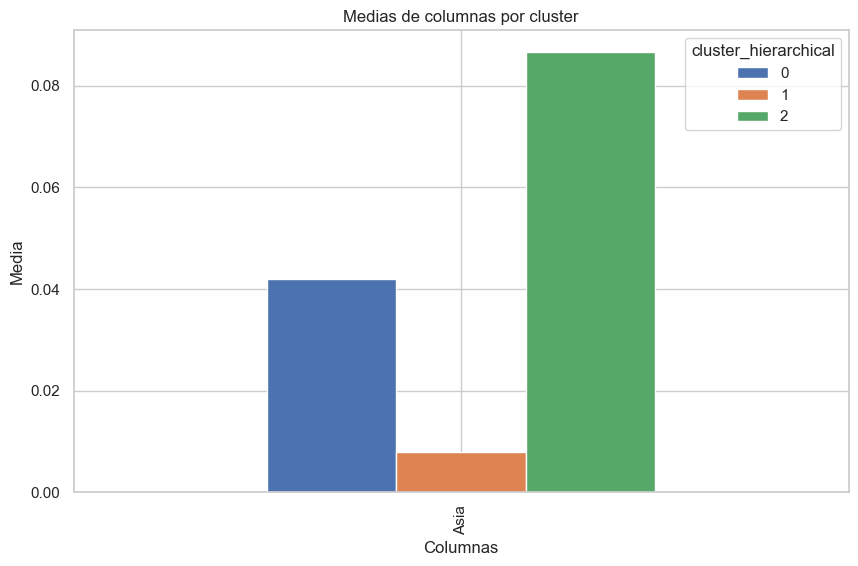

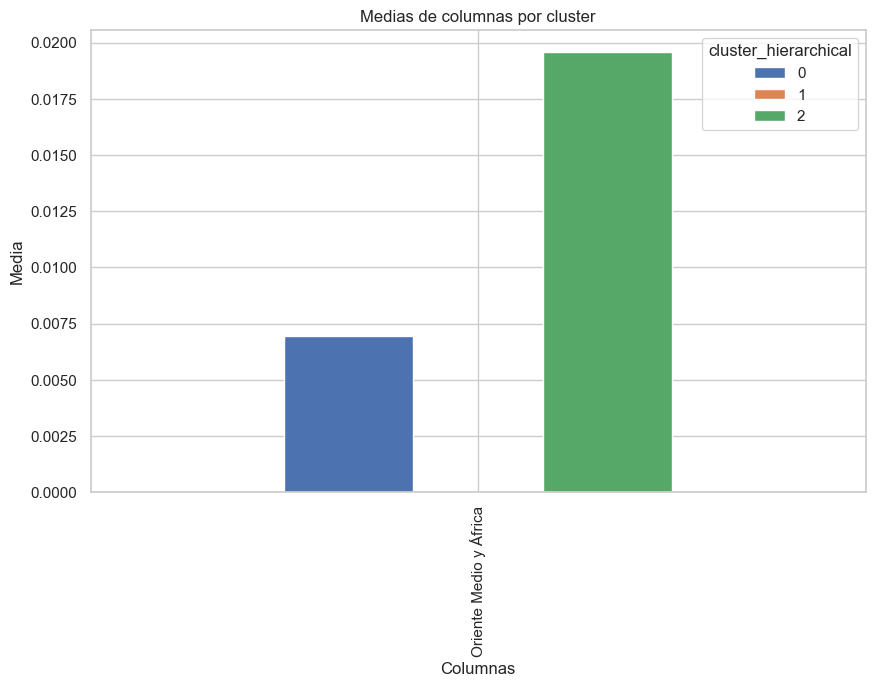

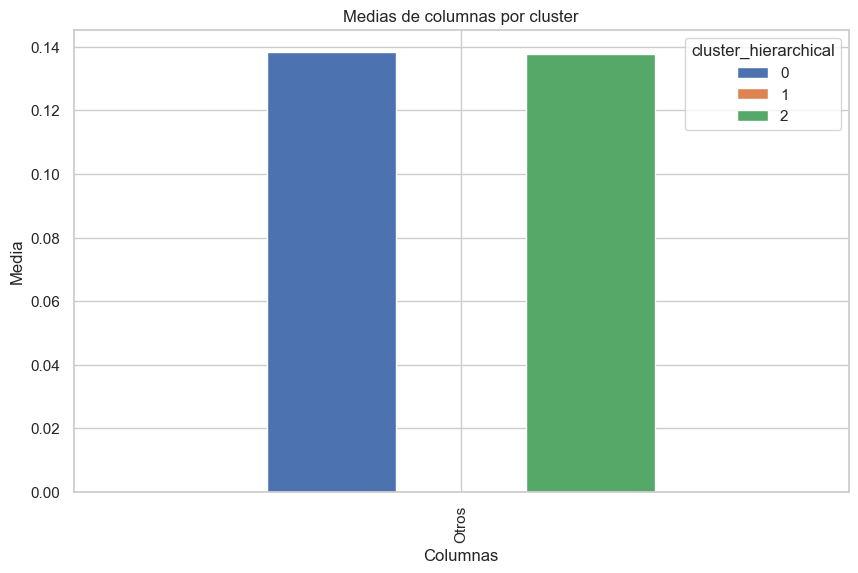

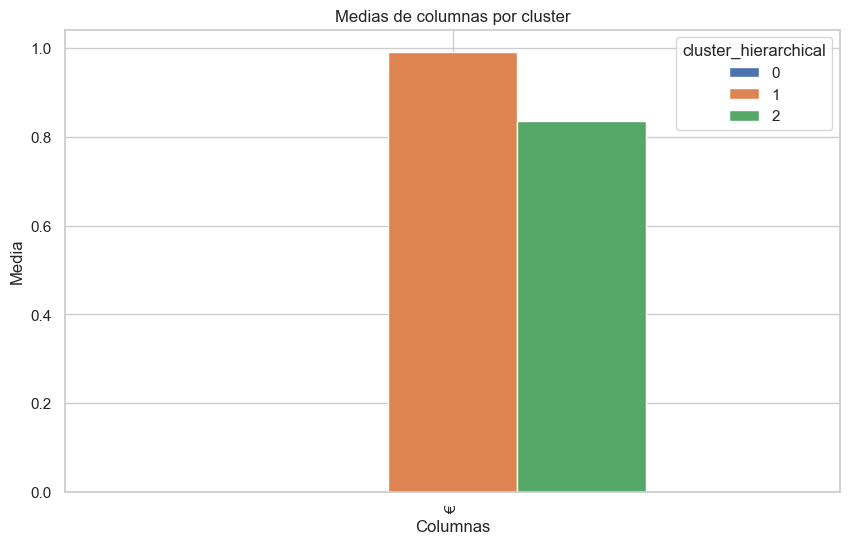

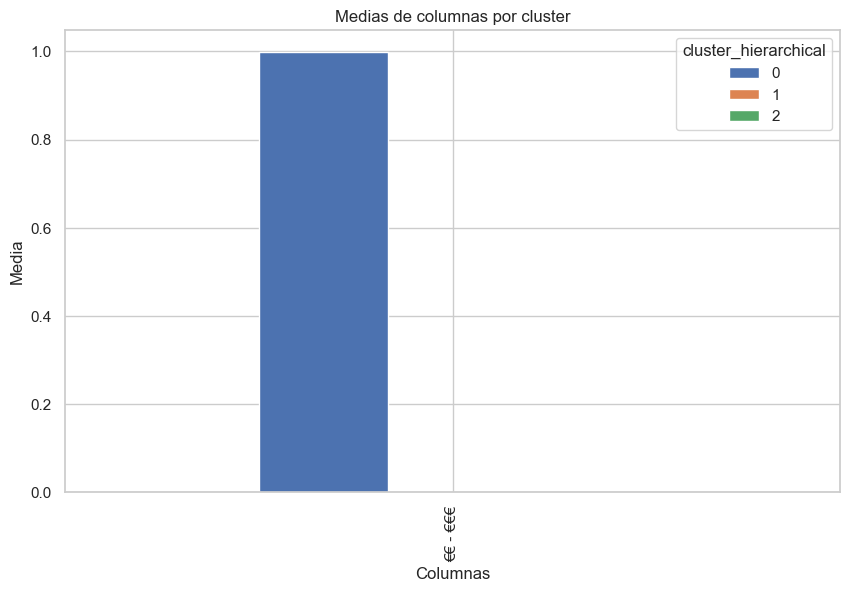

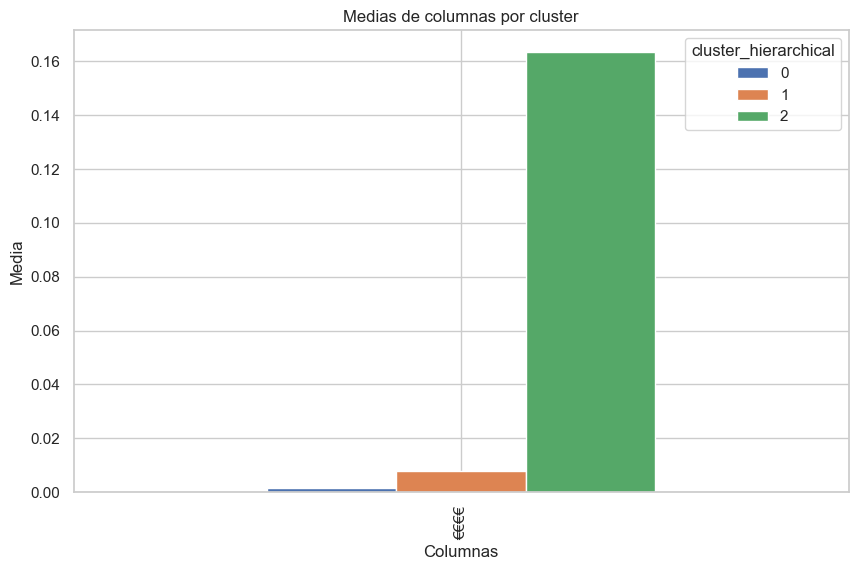

In [158]:
for col in df_clusterizado_2[["Awards", "Num_Reviews", 'Score', 'Europa', 'América del Norte', 'América del Sur', 'Asia', 'Oriente Medio y África', 'Otros', "€", "€€ - €€€", "€€€€"]].columns:
    # Agrupa por la columna de cluster y calcula las medias
    cluster_means = df_clusterizado_2[[col,'cluster_hierarchical']].groupby('cluster_hierarchical').mean()

    # Transpone el DataFrame para facilitar la representación
    cluster_means = cluster_means.T

    # Configura el estilo de seaborn
    sns.set(style="whitegrid")

    # Crea el gráfico de barras agrupadas
    cluster_means.plot(kind='bar', figsize=(10, 6))
    plt.title('Medias de columnas por cluster')
    plt.xlabel('Columnas')
    plt.ylabel('Media')
    plt.show()